# *Operacional Volume Completo*

In [161]:
import time
tempo = []
start_time = time.time()

## *1. ETL*

### *1.1. Extração dos dados*

#### 1.1.1. Importando bibliotecas

In [162]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sweetviz as sv

#### 1.1.2. Importando Data Frame

In [163]:
##### Dólar 1 min
caminho = r'C:\Users\Gustavo\OneDrive\Trabalho\Trading\Backtesting\Dados de cotacoes\WDOFUT_1min.csv'
df = pd.read_csv(caminho, sep = ';', index_col = 0)

In [164]:
df.tail()

,Abertura,Máxima,Mínima,Fechamento,Data.1,Volume Financeiro
Data,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df.dtypes

Abertura              object
Máxima                object
Mínima                object
Fechamento            object
Data.1                object
Volume Financeiro    float64
dtype: object

### *1.2. Transformação dos dados*

#### 1.2.1. Alterando nome das colunas

In [166]:
df.rename(columns = {df.columns[0]:'Open',\
                     df.columns[1]:'High',\
                     df.columns[2]:'Low',\
                     df.columns[3]:'Close',\
                     df.columns[5]:'Volume'}, inplace= True)

In [167]:
df.drop(['Data.1'], axis=1, inplace=True)

In [168]:
df.isna().sum()

Open      2786
High      2786
Low       2786
Close     2786
Volume    2786
dtype: int64

In [169]:
df.head()

,Open,High,Low,Close,Volume
Data,,,,,
21/03/2024 16:57,"4980,5","4981,5","4980,5",4981,29288800.0
21/03/2024 16:56,"4980,5",4981,"4980,5","4980,5",57479690.0
21/03/2024 16:55,4982,4982,"4980,5",4981,93847810.0
21/03/2024 16:54,"4981,5","4982,5",4981,4982,175212350.0
21/03/2024 16:53,"4980,5","4981,5","4980,5","4981,5",93344575.0


#### 1.2.2. Alterando tipo das colunas

In [170]:
df.index = pd.to_datetime(df.index, format = '%d/%m/%Y %H:%M')
#df.dropna(inplace = True)

# List of columns to convert to float64
floats = ['Open', 'High', 'Low', 'Close']
#ints = ['Bar', 'V', 'C', 'P', 'Stoch']

# Convert the columns to int64
#df[ints] = df[ints].astype('int64')

# Convert decimal separator and change data type to float
for col in floats:
    df[col] = df[col].str.replace(',', '.').astype(float)

In [171]:
df.sort_index(ascending = True, inplace = True)

<Axes: xlabel='Data'>

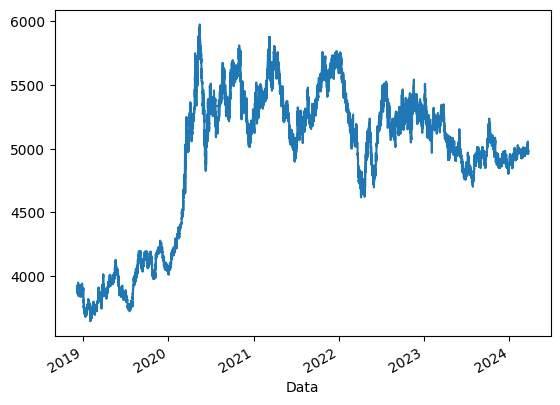

In [172]:
df.Open.plot()

In [173]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

df = df.loc[
    (df.index >= '2020-01-01')
    &(df.index <= '2022-12-31')]
df.Open.plot()

#### 1.2.3. Resample

In [174]:
# Time Frame Desejado
time_frame = 5

##### Filtro de Data

df = df.loc[df.index.year >= 2021]

##### 1.2.3.1. Antes do Resample

In [175]:
import random
specific_day = random.choice(df.index.date)

# Filter DataFrame for the specific day
df1 = df.loc[df.index.date == specific_day]

In [176]:
fig = go.Figure()
fig.add_trace(go.Candlestick(name='WDO', x=df1.index,
                             close=df1['Close'], open=df1['Open'],
                             high = df1['High'], low=df1['Low'] ))

fig.update_layout(xaxis_rangeslider_visible=False,
                  title_text='Gráfico de Candlestick 1 min <b>WDO<b>',
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  title_font_color='white',
                  width=1200,
                  height=500,
                  font_color='white')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

In [177]:
df = df.resample(f'{str(time_frame)}T').agg({\
         'Open' : 'first',\
         'High' : 'max',\
         'Low' : 'min',\
         'Close' : 'last',\
         'Volume': 'sum'})
df.dropna(inplace=True)

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\1841393262.py:1: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



##### 1.2.3.2. Depois do Resample

In [178]:
# Filter DataFrame for the specific day
df2 = df.loc[df.index.date == specific_day]

fig = go.Figure()
fig.add_trace(go.Candlestick(name='WDO', x=df2.index,
                             close=df2['Close'], open=df2['Open'],
                             high = df2['High'], low=df2['Low'] ))

fig.update_layout(xaxis_rangeslider_visible=False,
                  title_text=f'Gráfico de Candlestick {time_frame} min <b>WDO<b>',
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  title_font_color='white',
                  width=1200,
                  height=500,
                  font_color='white')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

#### 1.2.4. Dados de Data

In [179]:
df['Ano'] = df.index.year
df['Dia'] = df.index.date
df['Hora'] = df.index.hour
df['Minuto'] = df.index.minute
df['Week Day'] = df.index.strftime('%A')
df.head()

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day
Data,,,,,,,,,,
2018-12-07 09:20:00,3904.5,3909.0,3902.0,3907.5,9.628005e+08,2018,2018-12-07,9,20,Friday
2018-12-07 09:25:00,3907.5,3910.0,3905.5,3909.0,6.044757e+08,2018,2018-12-07,9,25,Friday
2018-12-07 09:30:00,3909.0,3909.5,3901.0,3904.5,7.107936e+08,2018,2018-12-07,9,30,Friday
2018-12-07 09:35:00,3904.5,3915.5,3903.0,3915.0,1.047039e+09,2018,2018-12-07,9,35,Friday
2018-12-07 09:40:00,3915.0,3919.0,3913.5,3917.5,6.517425e+08,2018,2018-12-07,9,40,Friday


#### 1.2.5. Criando coluna que classifica Manhã ou Tarde

In [180]:
df['Turno'] = np.where(df.index.hour < 12, 'Manhã', 'Tarde')

### *1.3. Carregamento (Load) dos dados*

In [181]:
def segundos_para_hh_mm_ss(segundos_float):
    segundos = int(segundos_float)
    horas = segundos // 3600
    minutos = (segundos % 3600) // 60
    segundos = segundos % 60

    return f'{horas:02d}:{minutos:02d}:{segundos:02d}'

# Exemplo de uso:
segundos_float = time.time() - start_time  # Substitua isso pelo seu valor de tempo em segundos como float
tempo.append(segundos_para_hh_mm_ss(segundos_float))

### *1.4. Tempo de Execução*

In [182]:
print(tempo[0])

00:00:12


## *2. Análise*

In [183]:
start_time = time.time()

### *2.1. Definindo propriedades do ativo*

#### 2.1.1. Ativo

In [184]:
# Encontrando o índice do último caractere '\'
indice_ultima_barra = caminho.rfind('\\')

# Usando slice para obter os 3 caracteres após o último '\'
tres_caracteres_apos_ultima_barra = caminho[indice_ultima_barra + 1:indice_ultima_barra + 4]

#### 2.1.1. Tick do Ativo

In [185]:
tick_wdo = 0.5
tick_win = 5
if tres_caracteres_apos_ultima_barra == 'WDO':
    tick = tick_wdo
elif tres_caracteres_apos_ultima_barra == 'WIN':
    tick = tick_win
else:
    print('Dados de ativo não registrados')
    tick = None
    
print(tick)

0.5


#### 2.1.2. Custos do Ativo

##### 2.1.2.1. Custos por Contrato (R$)

In [186]:
custo_wdo = 1.1
custo_win = 0.4
if tres_caracteres_apos_ultima_barra == 'WDO':
    custo_por_contrato = custo_wdo
elif tres_caracteres_apos_ultima_barra == 'WIN':
    custo_por_contrato = custo_win
else:
    print('Dados de ativo não registrados')
    custo_por_contrato = None
    
print(custo_por_contrato)

1.1


##### 2.1.2.2. Custos por Ponto por Contrato (R$)

In [187]:
custo_wdo_pt = 10
custo_win_pt = 0.25
if tres_caracteres_apos_ultima_barra == 'WDO':
    custo_por_ponto = custo_wdo_pt
elif tres_caracteres_apos_ultima_barra == 'WIN':
    custo_por_ponto = custo_win_pt
else:
    print('Dados de Ativo não registrados')
    custo_por_ponto = None
    
print(custo_por_ponto)

10


### *2.2. Definindo horários limites*

#### 2.2.1. Início e limite de abertura de posições [horas (24h)] - valores inclusos

In [188]:
inicio_abertura = 9
limite_abertura = 11

#### 2.2.2. Limite de fechamento de posições [horas (24h)] - valores não-inclusos

In [189]:
limite_fechamento = 17

### *2.3. Definindo Classes*

#### 2.3.1. Classificando Triggers

In [190]:
psv_c = ((df['Open'] > df['Close']) & (df['Volume'] < df['Volume'].shift())) #compra

psv_v = ((df['Open'] < df['Close']) & (df['Volume'] < df['Volume'].shift())) #venda


defesa_c = ((df['Open'] < df['Close']) & (df['Open'].shift() >= df['Close'].shift()) &\
     ((df['Close'] - df['Low'] > (df['High'] - df['Low']) * 2 / 3)) & (df['Volume'] > df['Volume'].shift())) #compra
    
defesa_v = ((df['Open'] > df['Close']) & (df['Open'].shift() <= df['Close'].shift()) &\
     (df['High'] - df['Close'] > (df['High'] - df['Low']) * 2 / 3) & (df['Volume'] > df['Volume'].shift()))   #venda


ler_c = ((df['Open'] > df['Close']) & (df['High'] - df['Close'] < (df['High'] - df['Low']) * 0.5) &\
     (df['Close']) & (df['Volume'] > df['Volume'].shift())) #compra
    
ler_v = ((df['Open'] < df['Close']) & (df['Close'] - df['Low'] < (df['High'] - df['Low']) * 0.5) &\
     (df['Volume'] > df['Volume'].shift())) #venda


df['Trigger'] = ''
df.loc[psv_c | psv_v, 'Trigger'] = 'PSV'
df.loc[defesa_c | defesa_v, 'Trigger'] = 'Defesa'
df.loc[ler_c | ler_v, 'Trigger'] = 'LER'

reset_condition = (df['Dia'] != df['Dia'].shift())
df.loc[reset_condition, 'Trigger'] = ''

#### 2.3.2. Compra ou Venda

In [191]:
compra = psv_c | defesa_c | ler_c

venda = psv_v | defesa_v | ler_v

df['C/V'] = ''
df.loc[compra, 'C/V'] = 'Compra'
df.loc[venda, 'C/V'] = 'Venda'

df.loc[reset_condition, 'C/V'] = ''

In [192]:
df.head(50)

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day,Turno,Trigger,C/V
Data,,,,,,,,,,,,,
2018-12-07 09:20:00,3904.5,3909.0,3902.0,3907.5,9.628005e+08,2018,2018-12-07,9,20,Friday,Manhã,,
2018-12-07 09:25:00,3907.5,3910.0,3905.5,3909.0,6.044757e+08,2018,2018-12-07,9,25,Friday,Manhã,PSV,Venda
2018-12-07 09:30:00,3909.0,3909.5,3901.0,3904.5,7.107936e+08,2018,2018-12-07,9,30,Friday,Manhã,,
2018-12-07 09:35:00,3904.5,3915.5,3903.0,3915.0,1.047039e+09,2018,2018-12-07,9,35,Friday,Manhã,Defesa,Compra
2018-12-07 09:40:00,3915.0,3919.0,3913.5,3917.5,6.517425e+08,2018,2018-12-07,9,40,Friday,Manhã,PSV,Venda
2018-12-07 09:45:00,3917.5,3920.5,3915.5,3919.0,6.968789e+08,2018,2018-12-07,9,45,Friday,Manhã,,
2018-12-07 09:50:00,3919.0,3923.5,3919.0,3921.5,7.359707e+08,2018,2018-12-07,9,50,Friday,Manhã,,
2018-12-07 09:55:00,3922.0,3926.5,3921.5,3923.5,9.207336e+08,2018,2018-12-07,9,55,Friday,Manhã,LER,Venda
2018-12-07 10:00:00,3923.5,3928.0,3923.0,3926.0,6.031522e+08,2018,2018-12-07,10,0,Friday,Manhã,PSV,Venda


#### 2.3.3. Classificando Volume

In [193]:
#Média do Volume do Dia
df['Avg_Volume_Day'] = df.groupby('Dia')['Volume'].transform(lambda x: x.expanding().mean())

In [194]:
df.head()

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day,Turno,Trigger,C/V,Avg_Volume_Day
Data,,,,,,,,,,,,,,
2018-12-07 09:20:00,3904.5,3909.0,3902.0,3907.5,9.628005e+08,2018,2018-12-07,9,20,Friday,Manhã,,,9.628005e+08
2018-12-07 09:25:00,3907.5,3910.0,3905.5,3909.0,6.044757e+08,2018,2018-12-07,9,25,Friday,Manhã,PSV,Venda,7.836381e+08
2018-12-07 09:30:00,3909.0,3909.5,3901.0,3904.5,7.107936e+08,2018,2018-12-07,9,30,Friday,Manhã,,,7.593566e+08
2018-12-07 09:35:00,3904.5,3915.5,3903.0,3915.0,1.047039e+09,2018,2018-12-07,9,35,Friday,Manhã,Defesa,Compra,8.312772e+08
2018-12-07 09:40:00,3915.0,3919.0,3913.5,3917.5,6.517425e+08,2018,2018-12-07,9,40,Friday,Manhã,PSV,Venda,7.953703e+08


In [195]:
hora_volume = '10:30'
h_vol = int(hora_volume[:2])
m_vol = int(hora_volume[3:])

In [196]:
# Condition based on time
time_condition = (df['Hora'] < h_vol) & (df['Minuto'] < m_vol)

# Condition for 'Trigger' == 'PSV'
trigger_condition_psv = (df['Trigger'] == 'PSV')

# Condition for 'Trigger' == 'Defesa'
trigger_condition_defesa = (df['Trigger'] == 'Defesa')

# Condition for 'Trigger' == 'LER'
trigger_condition_ler = (df['Trigger'] == 'LER')

# Calculate the expanding maximum and minimum volume for each day
expanding_max_volume = df.groupby('Dia')['Volume'].transform(lambda x: x.expanding().max())
expanding_min_volume = df.groupby('Dia')['Volume'].transform(lambda x: x.expanding().min())

# Condition for 'Volume' comparison - PSV
if time_condition.all():  # Check if the time condition holds for all rows
    # Compare 'Volume' with 50% of the expanding maximum volume for the day
    volume_condition_psv = df['Volume'] < expanding_max_volume * 0.7
else:
    # Compare 'Volume' with 50% of the 'Avg_Volume_Day'
    volume_condition_psv = df['Volume'] < df['Avg_Volume_Day']
    
# Condition for 'Volume' comparison - Defesa
if time_condition.all():  # Check if the time condition holds for all rows
    # Compare 'Volume' with 50% of the expanding maximum volume for the day
    volume_condition_defesa = df['Volume'] > expanding_min_volume / 0.7
else:
    # Compare 'Volume' with 50% of the 'Avg_Volume_Day'
    volume_condition_defesa = df['Volume'] > df['Avg_Volume_Day']

# Combine conditions using '&' (AND) operator
v_psv = trigger_condition_psv & volume_condition_psv
v_defesa = trigger_condition_defesa & volume_condition_defesa
v_ler = trigger_condition_ler & volume_condition_defesa


df['V'] = 0
df.loc[v_psv, 'V'] = 1
df.loc[v_defesa, 'V'] = 1
df.loc[v_ler, 'V'] = 1
df.tail()

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day,Turno,Trigger,C/V,Avg_Volume_Day,V
Data,,,,,,,,,,,,,,,
2024-03-21 16:35:00,4981.5,4983.5,4981.5,4983.0,541563450.0,2024,2024-03-21,16,35,Thursday,Tarde,,,1.083071e+09,0
2024-03-21 16:40:00,4982.5,4983.0,4981.0,4981.5,354689665.0,2024,2024-03-21,16,40,Thursday,Tarde,PSV,Compra,1.075239e+09,1
2024-03-21 16:45:00,4981.0,4982.0,4981.0,4981.5,173456680.0,2024,2024-03-21,16,45,Thursday,Tarde,PSV,Venda,1.065646e+09,1
2024-03-21 16:50:00,4981.0,4982.5,4980.0,4982.0,554393415.0,2024,2024-03-21,16,50,Thursday,Tarde,,,1.060264e+09,0
2024-03-21 16:55:00,4982.0,4982.0,4980.5,4981.0,180616300.0,2024,2024-03-21,16,55,Thursday,Tarde,PSV,Compra,1.051101e+09,1


#### 2.3.4. Calculando Fibo

In [197]:
# Extract unique days from the DataFrame
dias = df['Dia'].unique()
# Calculate Fibonacci levels for each unique day
for i in range(1, len(dias)):
    previous_day = dias[i - 1]

    # Extract data for the previous day
    previous_day_data = df[df['Dia'] == previous_day]
    
    previous_dia_max_high = previous_day_data['High'].max()
    previous_dia_min_low = previous_day_data['Low'].min()

    previous_dia_amplitude = previous_dia_max_high - previous_dia_min_low

    # Define Fibonacci levels
    fibonacci_levels = [-0.618, -0.5, -0.236, 0, 0.382, 0.618, 1, 1.236, 1.5, 1.618]

    # Calculate Fibonacci levels based on the previous 'Dia' amplitude
    for level in fibonacci_levels:
        df.loc[df['Dia'] == dias[i], f'Fibo_{level}'] = (previous_dia_amplitude * level) + previous_dia_min_low
        
df.dropna(inplace=True)

In [198]:
fibo = [f'Fibo_{level}' for level in fibonacci_levels]
df2 = df.loc[(df.index.date == specific_day) | (df.index.date == specific_day-timedelta(1))]

fig = go.Figure()
fig.add_trace(go.Candlestick(name='WDO', x=df2.index,
                             close=df2['Close'], open=df2['Open'],
                             high = df2['High'], low=df2['Low'] ))
for fib in fibo:
    fig.add_trace(go.Scatter(x=df2.index, y=df2[fib],
                             line=dict(color='white', width=1),
                             name=fib))
    # Create this adding my fibo lines contained in fibo = [f'Fibo_{level}' for level in fibonacci_levels]

fig.update_layout(xaxis_rangeslider_visible=False,
                  title_text=f'Gráfico de Candlestick {time_frame} min <b>WDO<b>',
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  title_font_color='white',
                  width=1200,
                  height=500,
                  font_color='white')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

#### 2.3.5. Classificando Região

In [199]:
df['Region'] = 0
df['Qual_Fibo1'] = ''
df['Qual_Fibo2'] = ''
for index, row in df.iterrows():
    operation = row['C/V']
    high_or_low = 'High' if operation == 'Compra' else 'Low'
    
    for i, fibo_col in enumerate(fibo[:-1]):  # Exclude the last Fibonacci column
        next_fibo_col = fibo[i + 1]
        if ((operation == 'Compra' and row[high_or_low] >= row[fibo_col] and row[high_or_low] < row[next_fibo_col]) or
            (operation == 'Venda' and row[high_or_low] > row[fibo_col] and row[high_or_low] <= row[next_fibo_col])):
            df.at[index, 'Region'] = i + 1
            df.at[index, 'Qual_Fibo1'] = fibo[i]
            df.at[index, 'Qual_Fibo2'] = fibo[i+1]
            break

In [200]:
set(df['Region'].loc[df['C/V']=='Compra'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [201]:
df[['C/V','High','Low','Region','Qual_Fibo1','Qual_Fibo2'] + fibo].head()

,C/V,High,Low,Region,Qual_Fibo1,Qual_Fibo2,Fibo_-0.618,Fibo_-0.5,Fibo_-0.236,Fibo_0,Fibo_0.382,Fibo_0.618,Fibo_1,Fibo_1.236,Fibo_1.5,Fibo_1.618
Data,,,,,,,,,,,,,,,,
2018-12-10 09:00:00,,3924.5,3904.0,0,,,3819.594,3827.5,3845.188,3861.0,3886.594,3902.406,3928.0,3943.812,3961.5,3969.406
2018-12-10 09:05:00,Compra,3924.0,3914.0,6,Fibo_0.618,Fibo_1,3819.594,3827.5,3845.188,3861.0,3886.594,3902.406,3928.0,3943.812,3961.5,3969.406
2018-12-10 09:10:00,Compra,3915.0,3910.0,6,Fibo_0.618,Fibo_1,3819.594,3827.5,3845.188,3861.0,3886.594,3902.406,3928.0,3943.812,3961.5,3969.406
2018-12-10 09:15:00,Compra,3915.5,3907.5,6,Fibo_0.618,Fibo_1,3819.594,3827.5,3845.188,3861.0,3886.594,3902.406,3928.0,3943.812,3961.5,3969.406
2018-12-10 09:20:00,Compra,3919.0,3909.5,6,Fibo_0.618,Fibo_1,3819.594,3827.5,3845.188,3861.0,3886.594,3902.406,3928.0,3943.812,3961.5,3969.406


#### 2.3.6. Classificando Contexto

In [202]:
df['C'] = 0

valid_columns1 = df.loc[df['Qual_Fibo1'] != '', 'Qual_Fibo1'].tolist()
valid_columns2 = df.loc[df['Qual_Fibo2'] != '', 'Qual_Fibo2'].tolist()

buy_conditions = (
    (df['C/V'] == 'Compra') &
    (
        (df['Low'] <= df.apply(lambda row: row[fibo[row['Region']-1]], axis=1)) |
        (df['Low'].shift(1) <= df.apply(lambda row: row[fibo[row['Region']-1]], axis=1))
    ) &
    (df['Close'] >= df.apply(lambda row: row[fibo[row['Region']-1]], axis=1))
)

sell_conditions = (
    (df['C/V'] == 'Venda') &
    (
        (df['High'] >= df.apply(lambda row: row[fibo[row['Region']]], axis=1)) |
        (df['High'].shift(1) >= df.apply(lambda row: row[fibo[row['Region']]], axis=1))
    ) &
    (df['Close'] <= df.apply(lambda row: row[fibo[row['Region']]], axis=1))
)


contexto = buy_conditions | sell_conditions

df.loc[contexto, 'C'] = 1


#### 2.3.7. Classificando Risco:Retorno "Payoff"

In [203]:
df['P'] = 0

buy_conditions = (
    (df['C/V'] == 'Compra') &
    ((df['High'] - df['Low']) + 2*tick <= df.apply(lambda row: row[fibo[row['Region']]], axis=1) - df['High'] + tick)
)

sell_conditions = (
    (df['C/V'] == 'Venda') &
    ((df['High'] - df['Low']) + 2*tick <= df['Low'] - tick - df.apply(lambda row: row[fibo[row['Region']-1]], axis=1))
)

contexto = buy_conditions | sell_conditions

df.loc[contexto, 'P'] = 1


#### 2.3.8. Calculando Estocástico (falta ajustar para o Lento)

In [204]:
def sto(close, low, high, n,id): 
    stok = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    if(id is 0):
        return stok
    else:
        return stok.rolling(3).mean()
    
# Conferir código acima


from ta.momentum import StochasticOscillator
from ta.trend import SMAIndicator
stoch = StochasticOscillator(close = df['Close'], high = df['High'], low = df['Low'], window = 9, smooth_window = 1)
df['Stoch_i'] = stoch.stoch()
mm_stoch = SMAIndicator(close = df['Stoch_i'], window = 3)
df['MM_Stoch'] = mm_stoch.sma_indicator()

df['Stoch'] = 0

buy_conditions = (
    (df['C/V'] == 'Compra') &
    (df['Stoch_i'] >= df['MM_Stoch'])
)

sell_conditions = (
    (df['C/V'] == 'Venda') &
    (df['Stoch_i'] <= df['MM_Stoch'])
)

contexto = buy_conditions | sell_conditions

df.loc[contexto, 'Stoch'] = 1

<>:3: SyntaxWarning:

"is" with a literal. Did you mean "=="?

<>:3: SyntaxWarning:

"is" with a literal. Did you mean "=="?

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\1679768881.py:3: SyntaxWarning:

"is" with a literal. Did you mean "=="?



In [205]:
# Filter DataFrame for the specific day
df2 = df.loc[df.index.date == specific_day]

fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(go.Candlestick(name='WDO', x=df2.index,
                             close=df2['Close'], open=df2['Open'],
                             high = df2['High'], low=df2['Low']),
                             row = 1, col = 1)
fig.add_trace(go.Scatter(name='Stoch', x=df2.index, y = df2['Stoch_i']),
                             row = 2, col = 1)
fig.add_trace(go.Scatter(name='MM3', x=df2.index, y = df2['MM_Stoch']),
                             row = 2, col = 1)

fig.update_layout(xaxis_rangeslider_visible=False,
                  title_text=f'Gráfico de {time_frame} min <b>WDO<b>',
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  title_font_color='white',
                  width=1200,
                  height=500,
                  font_color='white')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

#### 2.3.9. Criando IDs com Classes

In [206]:
df['VCP_ID'] = df['V'].astype(str) + df['C'].astype(str) + df['P'].astype(str)
df['VCP_Stoch_ID'] = df['V'].astype(str) + df['C'].astype(str) + df['P'].astype(str) + df['Stoch'].astype(str)
df['ID'] = df['Trigger'] + df['VCP_Stoch_ID']

#### 2.3.10. Criando Scores com Soma de Classes

In [207]:
df['VCP'] = df['V'] + df['C'] + df['P']
df['VCP_Stoch'] = df['V'] + df['C'] + df['P'] + df['Stoch']

### *2.4. Verificando se o trade ativou*

In [208]:
#linhas para avaliar
linhas = len(df)

In [209]:
#Shift Columns OHLC
columns_to_shift = ['Open', 'High', 'Low', 'Close']

df[['Open1', 'High1', 'Low1', 'Close1']] = df[columns_to_shift].shift(-1)

In [210]:
df

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day,...,Stoch,VCP_ID,VCP_Stoch_ID,ID,VCP,VCP_Stoch,Open1,High1,Low1,Close1
Data,,,,,,,,,,,,,,,,,,,,,
2018-12-10 09:00:00,3908.0,3924.5,3904.0,3924.0,1.017276e+09,2018,2018-12-10,9,0,Monday,...,0,000,0000,0000,0,0,3924.0,3924.0,3914.0,3915.0
2018-12-10 09:05:00,3924.0,3924.0,3914.0,3915.0,5.721043e+08,2018,2018-12-10,9,5,Monday,...,0,100,1000,PSV1000,1,1,3915.0,3915.0,3910.0,3914.5
2018-12-10 09:10:00,3915.0,3915.0,3910.0,3914.5,8.090760e+08,2018,2018-12-10,9,10,Monday,...,0,101,1010,LER1010,2,2,3914.5,3915.5,3907.5,3909.5
2018-12-10 09:15:00,3914.5,3915.5,3907.5,3909.5,5.343833e+08,2018,2018-12-10,9,15,Monday,...,0,101,1010,PSV1010,2,2,3909.5,3919.0,3909.5,3917.5
2018-12-10 09:20:00,3909.5,3919.0,3909.5,3917.5,7.803543e+08,2018,2018-12-10,9,20,Monday,...,0,100,1000,Defesa1000,1,1,3917.0,3920.0,3911.0,3913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 16:35:00,4981.5,4983.5,4981.5,4983.0,5.415634e+08,2024,2024-03-21,16,35,Thursday,...,0,000,0000,0000,0,0,4982.5,4983.0,4981.0,4981.5
2024-03-21 16:40:00,4982.5,4983.0,4981.0,4981.5,3.546897e+08,2024,2024-03-21,16,40,Thursday,...,0,101,1010,PSV1010,2,2,4981.0,4982.0,4981.0,4981.5
2024-03-21 16:45:00,4981.0,4982.0,4981.0,4981.5,1.734567e+08,2024,2024-03-21,16,45,Thursday,...,1,101,1011,PSV1011,2,3,4981.0,4982.5,4980.0,4982.0


In [211]:
# Where

df['Ativou'] = np.where(
    (df['C/V'] == 'Compra') & (df['High1'] > df['High']) &
    (df.index.hour >= inicio_abertura) & (df.index.hour <= limite_abertura),
    np.where(
        df['Low1'] < df['Low'],
        np.where(
            df['Close1'] > df['Open1'],
            'Ativou e nao stopou',
            'Ativou e stopou'
        ),
        'Ativou'
    ),
    np.where(
        (df['C/V'] == 'Venda') & (df['Low1'] < df['Low']) &
        (df.index.hour >= inicio_abertura) & (df.index.hour <= limite_abertura),
        np.where(
            df['High1'] > df['High'],
            np.where(
                df['Close1'] < df['Open1'],
                'Ativou e nao stopou',
                'Ativou e stopou'
            ),
            'Ativou'
        ),
        ''
    )
)

                                 

#### 2.3.1. Ativou e Stopou / Ativou [%]

In [212]:
str(round(len(df[df['Ativou'] == 'Ativou e stopou'])*100/len(df[df['Ativou'] != '']),2)) + '%'

'7.27%'

### *2.5. Máxima Exposição Positiva - MEP e Custos Operacionais*

#### 2.5.1. Ajustando índice de df

In [213]:
df['Data'] = df.index
df['Hora'] = df.index.hour
df.reset_index(drop=True,inplace=True)
df.sort_values('Data',inplace = True, ascending = True)

#### 2.5.2. Calculando MEP

In [214]:
def calculate_var_gain(row):
    if row['Ativou'] == 'Ativou':
        if row['C/V'] == 'Compra':
            j = row.name + 1
            amplitude = row['High'] - row['Low']
            entrada = row['High'] + tick
            max_high = 0
            while (j < len(df)) and not ((df.at[j, 'Low'] <= row['Low'] - tick) or (df.Hora[j] >= limite_fechamento)):
                if df.at[j, 'High'] > max_high:
                    max_high = df.at[j, 'High']
                    var_gain = (max_high - entrada) / (amplitude + (2 * tick)) if (amplitude + (2 * tick)) != 0 else 0
                j += 1
            return var_gain if 'var_gain' in locals() else 0
        elif row['C/V'] == 'Venda':
            j = row.name + 1
            amplitude = row['High'] - row['Low']
            entrada = row['Low'] - tick
            min_low = float('inf')
            while (j < len(df)) and not ((df.at[j, 'High'] >= row['High'] + tick) or (df.Hora[j] >= limite_fechamento)):
                if df.at[j, 'Low'] < min_low:
                    min_low = df.at[j, 'Low']
                    var_gain = (entrada - min_low) / (amplitude + (2 * tick)) if (amplitude + (2 * tick)) != 0 else 0
                j += 1
            return var_gain if 'var_gain' in locals() else 0
        else:
            return 0
    elif row['Ativou'] == 'Ativou e stopou':
        if row['C/V'] == 'Compra':
            j = row.name + 1
            amplitude = row['High'] - row['Low']
            entrada = row['High'] + tick
            max_high = df.at[j, 'High']
            var_gain = (max_high - entrada) / (amplitude + (2 * tick)) if (amplitude + (2 * tick)) != 0 else 0
            return var_gain if 'var_gain' in locals() else 0
        elif row['C/V'] == 'Venda':
            j = row.name + 1
            amplitude = row['High'] - row['Low']
            entrada = row['Low'] - tick
            min_low = df.at[j, 'Low']
            var_gain = (entrada - min_low) / (amplitude + (2 * tick)) if (amplitude + (2 * tick)) != 0 else 0
            return var_gain if 'var_gain' in locals() else 0
        
    elif row['Ativou'] == 'Ativou e nao stopou':
        if row['C/V'] == 'Compra':
            j = row.name + 2
            i = j - 1
            amplitude = row['High'] - df.at[i, 'Low'] if (j + 1 < len(df)) else 0
            entrada = row['High'] + tick if (j + 1 < len(df)) else 0
            max_high = 0
            while (j < len(df)) and not ((df.at[j, 'Low'] <= row['Low'] - tick) or (df.Hora[j] >= limite_fechamento)):
                if df.at[j, 'High'] > max_high:
                    max_high = df.at[j, 'High']
                    var_gain = (max_high - entrada) / (amplitude + (2 * tick)) if (amplitude + (2 * tick)) != 0 else 0
                j += 1
            return var_gain if 'var_gain' in locals() else 0
        elif row['C/V'] == 'Venda':
            j = row.name + 2
            i = j - 1
            amplitude = df.at[i, 'High'] - row['Low'] if (j + 1 < len(df)) else 0
            entrada = row['Low'] - tick if (j + 1 < len(df)) else 0
            min_low = float('inf')
            while (j < len(df)) and not ((df.at[j, 'High'] >= row['High'] + tick) or (df.Hora[j] >= limite_fechamento)):
                if df.at[j, 'Low'] < min_low:
                    min_low = df.at[j, 'Low']
                    var_gain = (entrada - min_low) / (amplitude + (2 * tick)) if (amplitude + (2 * tick)) != 0 else 0
                j += 1
            return var_gain if 'var_gain' in locals() else 0
        else:
            return 0
    else:
        return 0

# Apply the function to create the 'MEP' column
df['MEP'] = df.apply(calculate_var_gain, axis=1)

In [215]:
df.index = df['Data']
df['Data'] = df.index

In [216]:
df[['ID','Trigger','V','C','P','Region','Stoch','Data','Dia','Open','High','Low','Close','C/V','MEP','Ativou']].loc[df['Ativou'] == 'Ativou e stopou'].head(50)

,ID,Trigger,V,C,P,Region,Stoch,Data,Dia,Open,High,Low,Close,C/V,MEP,Ativou
Data,,,,,,,,,,,,,,,,
2018-12-10 09:10:00,LER1010,LER,1,0,1,6,0,2018-12-10 09:10:00,2018-12-10,3915.0,3915.0,3910.0,3914.5,Compra,0.000000,Ativou e stopou
2018-12-11 09:20:00,PSV1011,PSV,1,0,1,4,1,2018-12-11 09:20:00,2018-12-11,3907.0,3911.5,3906.5,3909.5,Venda,0.000000,Ativou e stopou
2018-12-11 09:55:00,Defesa1010,Defesa,1,0,1,3,0,2018-12-11 09:55:00,2018-12-11,3895.0,3900.0,3894.0,3894.5,Venda,0.000000,Ativou e stopou
2018-12-11 10:05:00,PSV1000,PSV,1,0,0,4,0,2018-12-11 10:05:00,2018-12-11,3898.0,3901.0,3896.5,3898.5,Venda,0.090909,Ativou e stopou
2018-12-12 10:50:00,Defesa1101,Defesa,1,1,0,2,1,2018-12-12 10:50:00,2018-12-12,3872.5,3877.0,3871.0,3875.5,Compra,0.000000,Ativou e stopou
2018-12-13 10:35:00,PSV1001,PSV,1,0,0,5,1,2018-12-13 10:35:00,2018-12-13,3875.0,3875.5,3873.0,3874.5,Compra,0.000000,Ativou e stopou
2018-12-17 10:25:00,PSV1010,PSV,1,0,1,7,0,2018-12-17 10:25:00,2018-12-17,3926.5,3928.0,3926.5,3927.0,Venda,0.200000,Ativou e stopou
2018-12-18 10:25:00,PSV1010,PSV,1,0,1,4,0,2018-12-18 10:25:00,2018-12-18,3893.0,3893.5,3890.5,3892.0,Compra,0.125000,Ativou e stopou
2018-12-19 10:20:00,PSV1010,PSV,1,0,1,4,0,2018-12-19 10:20:00,2018-12-19,3890.0,3891.0,3889.0,3890.5,Venda,0.166667,Ativou e stopou


#### 2.5.3. Criando novo DF com apenas trades que ativaram (df_ativou)

In [217]:
df_ativou = df[df['Ativou'] != ''].copy()

In [218]:
set(df_ativou.Trigger)

{'Defesa', 'LER', 'PSV'}

#### 2.5.4. Custos

##### 2.5.4.1. Amplitude da entrada (risco)

In [219]:
df_ativou['Risco_pts'] = np.where(
    (df_ativou['Ativou'] == 'Ativou') | (df_ativou['Ativou'] == 'Ativou e stopou'),
    df_ativou['High'] - df_ativou['Low'] + 2 * tick,
    np.where(
        (df_ativou['Ativou'] == 'Ativou e nao stopou') & (df_ativou['C/V'] == 'Compra'),
        df_ativou['High'] - df_ativou['Low1'] + 2 * tick,
        np.where(
            (df_ativou['Ativou'] == 'Ativou e nao stopou') & (df_ativou['C/V'] == 'Venda'),
            df_ativou['High1'] - df_ativou['Low'] + 2 * tick,
            0
        )
    )
)

##### 2.5.4.2. Número de Contratos para um Risco de R$1000,00

In [220]:
df_ativou['Contratos'] = 1000//(df_ativou['Risco_pts']*custo_por_ponto)

##### 2.5.4.3. Custo para um Risco de R$1000,00

In [221]:
df_ativou['Custo'] = df_ativou['Contratos']*custo_por_contrato*2 # Nos custos, considera-se a abertura e fechamento da operação. Logo, *2.

#### 2.5.4. Funções personalizadas para cálculo geral

In [222]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)
def trades(x):
    return x.count()
#resultado total dividido pelo número de trades
def saldo_trades(x):
    return x.sum()/x.count()

#### 2.5.5. Groupby com IDs

In [223]:
df_GB = df_ativou.groupby('ID')
column = df_GB['MEP']
GB = round(column.agg([np.mean, np.std, q1, np.median, q3, np.min, np.max, trades,saldo_trades]),2)
GB[GB['trades']>30].sort_values('saldo_trades',ascending = False).head(15)

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\3737862816.py:3: FutureWarning:

The provided callable <function mean at 0x000001D64174F4C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\3737862816.py:3: FutureWarning:

The provided callable <function std at 0x000001D64174F5E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\3737862816.py:3: FutureWarning:

The provided callable <function median at 0x000001D641A85E50> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.

C:\Users\Gustavo\AppData\Local\Temp\ipykern

,mean,std,q1,median,q3,min,max,trades,saldo_trades
ID,,,,,,,,,
PSV0111,3.13,2.98,0.48,2.50,5.14,0.00,10.43,39,3.13
PSV1111,2.43,3.45,0.33,1.03,3.20,-0.14,23.88,342,2.43
Defesa0110,2.43,3.33,0.30,0.86,3.29,0.06,14.86,48,2.43
Defesa1110,2.23,2.44,0.50,1.12,3.52,0.02,9.86,39,2.23
PSV0011,2.22,2.24,0.33,1.33,3.90,0.00,8.50,67,2.22
PSV1100,2.20,2.78,0.29,1.00,3.35,0.00,15.00,181,2.20
LER1010,2.18,2.74,0.34,1.29,3.24,0.00,20.87,135,2.18
PSV1110,2.16,2.74,0.28,0.90,3.08,-0.22,14.12,475,2.16
Defesa1010,2.15,2.78,0.27,1.03,2.67,0.00,12.26,52,2.15


#### 2.5.6. Concatenando df_ativou com alvos

In [224]:
df_ativou.reset_index(drop=True,inplace=True)

In [225]:
df_ativou

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day,...,Open1,High1,Low1,Close1,Ativou,Data,MEP,Risco_pts,Contratos,Custo
0,3915.0,3915.0,3910.0,3914.5,8.090760e+08,2018,2018-12-10,9,10,Monday,...,3914.5,3915.5,3907.5,3909.5,Ativou e stopou,2018-12-10 09:10:00,0.000000,6.0,16.0,35.2
1,3914.5,3915.5,3907.5,3909.5,5.343833e+08,2018,2018-12-10,9,15,Monday,...,3909.5,3919.0,3909.5,3917.5,Ativou,2018-12-10 09:15:00,0.444444,9.0,11.0,24.2
2,3909.5,3919.0,3909.5,3917.5,7.803543e+08,2018,2018-12-10,9,20,Monday,...,3917.0,3920.0,3911.0,3913.0,Ativou,2018-12-10 09:20:00,0.047619,10.5,9.0,19.8
3,3917.0,3920.0,3911.0,3913.0,7.880079e+08,2018,2018-12-10,9,25,Monday,...,3912.5,3913.5,3907.0,3910.0,Ativou,2018-12-10 09:25:00,0.350000,10.0,10.0,22.0
4,3912.5,3913.5,3907.0,3910.0,7.032413e+08,2018,2018-12-10,9,30,Monday,...,3909.5,3916.0,3908.0,3915.5,Ativou,2018-12-10 09:30:00,1.733333,7.5,13.0,28.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,4978.0,4981.5,4977.0,4978.5,2.373540e+09,2024,2024-03-21,10,30,Thursday,...,4978.0,4979.0,4976.0,4976.5,Ativou,2024-03-21 10:30:00,0.454545,5.5,18.0,39.6
13010,4976.0,4983.5,4975.0,4982.5,2.995427e+09,2024,2024-03-21,10,45,Thursday,...,4982.5,4985.0,4979.5,4984.0,Ativou,2024-03-21 10:45:00,0.315789,9.5,10.0,22.0
13011,4984.0,4984.0,4979.5,4982.0,1.506724e+09,2024,2024-03-21,10,55,Thursday,...,4981.5,4987.0,4981.0,4986.0,Ativou,2024-03-21 10:55:00,0.454545,5.5,18.0,39.6
13012,4981.0,4984.0,4980.0,4983.5,8.203598e+08,2024,2024-03-21,11,35,Thursday,...,4983.5,4983.5,4978.0,4981.0,Ativou,2024-03-21 11:35:00,0.300000,5.0,20.0,44.0


In [226]:
op = []
columns = []
div = 5

for j in range(1,21):
    op_aux = []
    columns.append(str(round(j/div,1)))
    for i in range(0,len(df_ativou)):
        if (df_ativou.MEP[i]) >= j/div:
            op_aux.append(j/div)

        else: 
            op_aux.append(-1)

    op.append(op_aux)


alvos = pd.DataFrame(np.transpose(op),columns=columns)
results = pd.concat([df_ativou,alvos],axis=1,copy=True)

In [227]:
df_ativou.head()

,Open,High,Low,Close,Volume,Ano,Dia,Hora,Minuto,Week Day,...,Open1,High1,Low1,Close1,Ativou,Data,MEP,Risco_pts,Contratos,Custo
0,3915.0,3915.0,3910.0,3914.5,809076000.0,2018,2018-12-10,9,10,Monday,...,3914.5,3915.5,3907.5,3909.5,Ativou e stopou,2018-12-10 09:10:00,0.000000,6.0,16.0,35.2
1,3914.5,3915.5,3907.5,3909.5,534383330.0,2018,2018-12-10,9,15,Monday,...,3909.5,3919.0,3909.5,3917.5,Ativou,2018-12-10 09:15:00,0.444444,9.0,11.0,24.2
2,3909.5,3919.0,3909.5,3917.5,780354285.0,2018,2018-12-10,9,20,Monday,...,3917.0,3920.0,3911.0,3913.0,Ativou,2018-12-10 09:20:00,0.047619,10.5,9.0,19.8
3,3917.0,3920.0,3911.0,3913.0,788007945.0,2018,2018-12-10,9,25,Monday,...,3912.5,3913.5,3907.0,3910.0,Ativou,2018-12-10 09:25:00,0.350000,10.0,10.0,22.0
4,3912.5,3913.5,3907.0,3910.0,703241340.0,2018,2018-12-10,9,30,Monday,...,3909.5,3916.0,3908.0,3915.5,Ativou,2018-12-10 09:30:00,1.733333,7.5,13.0,28.6


In [228]:
results.index = results.Data
results = results.sort_index(ascending = True)

### *2.6. Adicionando Colunas com Resultado Acumulado, Custos e Drawdown por ID*

#### 2.6.1. Adicionando colunas com resultado acumulado em cada alvo

In [229]:
acumulado = []

for j in range(0,len(columns)):
    results['Acum_' + columns[j]] = results.groupby(['ID'])[columns[j]].cumsum()
    acumulado.append('Acum_' + columns[j])

#### 2.6.2. Adicionando colunas com picos acumulados em cada alvo

In [230]:
picos = []

for j in range(0,len(columns)):
    results['Picos_' + columns[j]] = results.groupby(['ID'])['Acum_' + columns[j]].cummax()
    picos.append('Picos_' + columns[j])

#### 2.6.3. Adicionando colunas com drawdown acumulado em cada alvo

In [231]:
dd = []
for j in range(0,len(columns)):
    results['DD_' + columns[j]] = results['Acum_' + columns[j]] - results['Picos_' + columns[j]]
    dd.append('DD_' + columns[j])

In [232]:
results.drop(picos, axis = 1, inplace = True)
results.drop(['Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)

#### 2.6.4. Adicionando colunas com variação para quartis de resultado acumulado

In [233]:
periodo = 15

In [234]:
acum_30d = []
for j in range(0,len(columns)):
    results['Acum_30d' + columns[j]] = results.groupby('ID')['Acum_' + columns[j]].diff(periods=periodo)
    acum_30d.append('Acum_30d' + columns[j])

#### 2.6.5. Adicionando colunas com variação para quartis de drawdown

In [235]:
dd_30d = []
for j in range(0,len(columns)):
    results['DD_30d' + columns[j]] = results.groupby('ID')['DD_' + columns[j]].diff(periods=periodo)
    dd_30d.append('DD_30d' + columns[j])

### *2.7. Criando tabelas por ID*

#### 2.7.1. Tabela Saldo Trades

In [236]:
tabela_saldo_trades = pd.pivot_table(results, index = 'ID',values = columns, aggfunc = [saldo_trades])
tabela_saldo_trades.columns = tabela_saldo_trades.columns.droplevel()

##### 2.7.1.1. Adicionando colunas Max_saldo_trades e Alvo

In [237]:
tabela_saldo_trades['Max_saldo_trades'] = tabela_saldo_trades.max(axis=1)
column_names = list(tabela_saldo_trades.columns.values)


tabela_saldo_trades['Alvo_saldo'] = tabela_saldo_trades.idxmax(axis = 1)
tabela_saldo_trades = tabela_saldo_trades.sort_values('Max_saldo_trades',ascending=False)

#### 2.7.2. Tabela Razão Drawdown

##### 2.7.2.1. Tabelão Resultado Acumulado + Drawdown

In [238]:
tabela_acumulado = pd.pivot_table(results, index = 'ID',values = acumulado, aggfunc = 'max')
#tabela_acumulado.columns = tabela_acumulado.columns.droplevel()

tabela_dd = pd.pivot_table(results, index = 'ID',values = dd, aggfunc = 'min')
#tabela_dd.columns = tabela_dd.columns.droplevel()

tabelao = pd.concat([tabela_acumulado,tabela_dd],axis=1,copy=True)
trades = column.agg(['count'])
trades.rename(columns={"count": "Trades"}, inplace = True)
tabelao = pd.merge(tabelao,  trades,\
          how = 'left', left_index = True, right_index = True)
trades.sort_values('Trades',ascending=False)

,Trades
ID,
PSV1010,2183
PSV1000,1613
Defesa1001,770
Defesa1101,734
PSV1011,712
Defesa0001,700
Defesa1111,522
Defesa0111,521
Defesa0011,510


In [239]:
tabelao.head()

,Acum_0.2,Acum_0.4,Acum_0.6,Acum_0.8,Acum_1.0,Acum_1.2,Acum_1.4,Acum_1.6,Acum_1.8,Acum_2.0,...,DD_2.4,DD_2.6,DD_2.8,DD_3.0,DD_3.2,DD_3.4,DD_3.6,DD_3.8,DD_4.0,Trades
ID,,,,,,,,,,,,,,,,,,,,,
Defesa0000,1.2,2.0,1.2,1.6,2.0,2.6,3.2,3.8,4.4,5.0,...,-29.0,-27.0,-27.8,-29.0,-39.0,-37.0,-41.4,-44.0,-42.0,98
Defesa0001,3.0,3.4,4.0,3.2,6.0,4.8,8.6,4.8,7.8,8.0,...,-47.8,-61.2,-73.2,-71.0,-69.8,-76.4,-100.2,-125.4,-142.0,700
Defesa0010,1.2,3.2,2.4,0.8,3.0,2.0,7.0,6.8,8.6,13.0,...,-18.0,-17.6,-21.4,-22.0,-21.6,-21.2,-21.6,-20.4,-21.0,87
Defesa0011,1.2,5.6,3.2,4.8,11.0,10.4,4.8,7.8,16.4,22.0,...,-100.4,-97.0,-114.2,-131.0,-134.2,-139.4,-166.2,-175.6,-167.0,510
Defesa0100,0.8,0.4,0.6,0.8,1.0,2.0,3.4,5.6,7.8,10.0,...,-5.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-7.0,-7.0,23


##### 2.7.2.2. Adicionando colunas Razão Drawdown

In [240]:
razao_dd = []
for i in range(0,len(columns)):
    tabelao['Razao_DD_' + columns[i] + ' '] = (-tabelao['DD_' + columns[i]])/tabelao['Acum_' + columns[i]]
    razao_dd.append('Razao_DD_' + columns[i] + ' ')

In [241]:
tabelao.drop(acumulado, axis=1,inplace = True)
tabelao.drop(dd, axis=1,inplace = True)


###### 2.7.2.1.1. Visualizando Razão DD por ID

<Axes: ylabel='ID'>

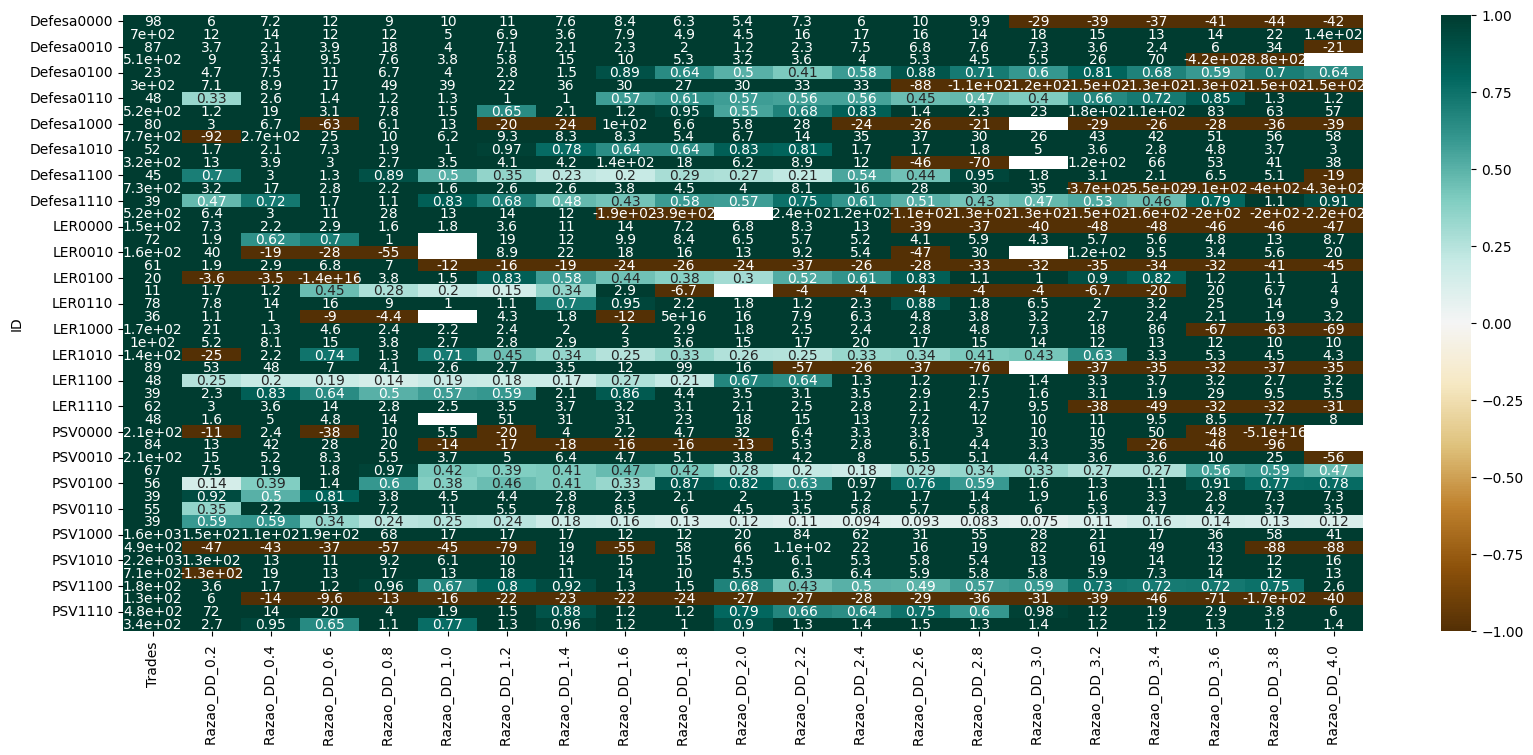

In [242]:
plt.figure(figsize = (20,8))

sns.heatmap(tabelao,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)

##### 2.7.2.3. Removendo valores incoerentes

In [243]:
razao_dd = tabelao._get_numeric_data()

razao_dd[(razao_dd <= 0) | (razao_dd > 100000)] = 1

<Axes: ylabel='ID'>

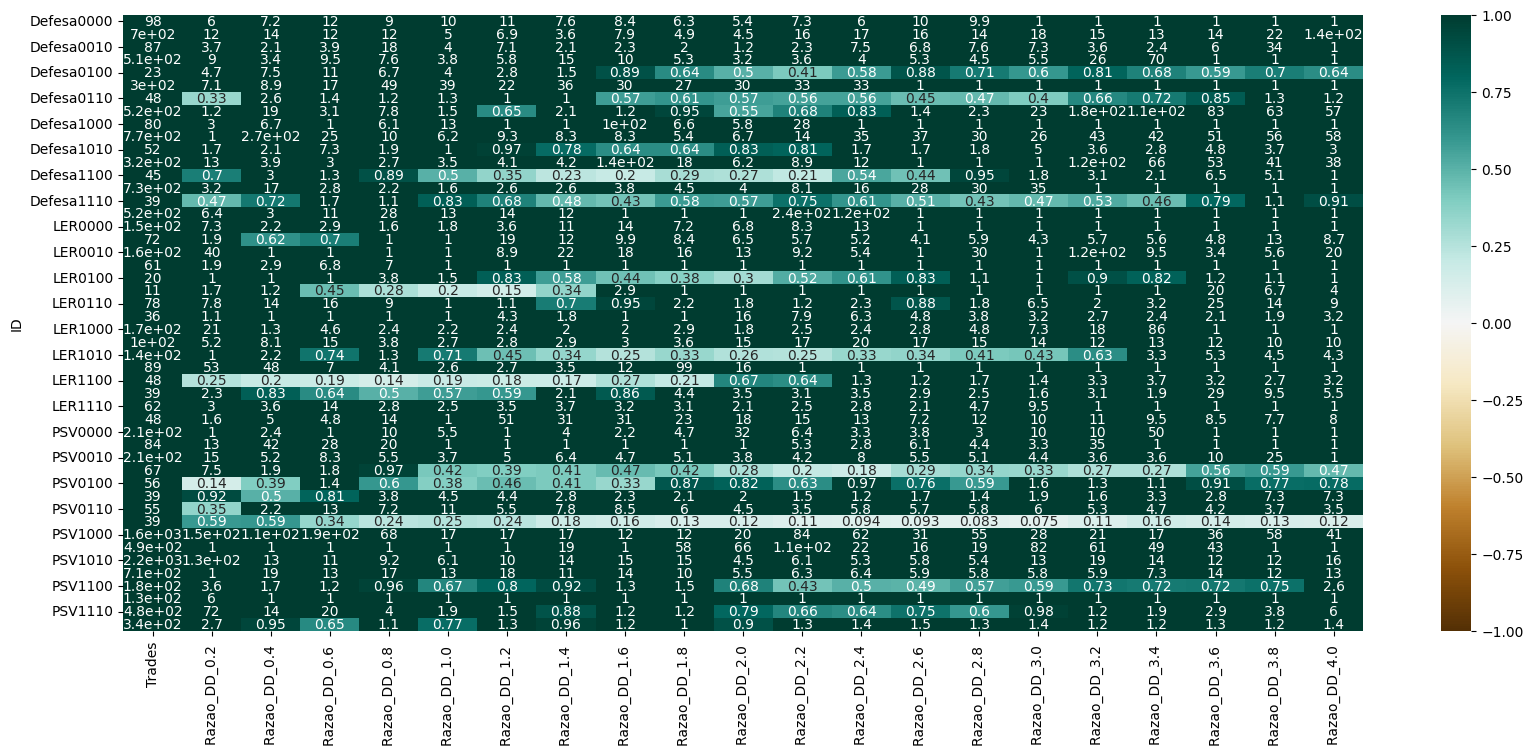

In [244]:
plt.figure(figsize = (20,8))

sns.heatmap(razao_dd,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)

##### 2.7.3.1. Adicionando colunas Min_Razao_DD e Alvo

In [245]:
razao_dd.columns

Index(['Trades', 'Razao_DD_0.2 ', 'Razao_DD_0.4 ', 'Razao_DD_0.6 ',
       'Razao_DD_0.8 ', 'Razao_DD_1.0 ', 'Razao_DD_1.2 ', 'Razao_DD_1.4 ',
       'Razao_DD_1.6 ', 'Razao_DD_1.8 ', 'Razao_DD_2.0 ', 'Razao_DD_2.2 ',
       'Razao_DD_2.4 ', 'Razao_DD_2.6 ', 'Razao_DD_2.8 ', 'Razao_DD_3.0 ',
       'Razao_DD_3.2 ', 'Razao_DD_3.4 ', 'Razao_DD_3.6 ', 'Razao_DD_3.8 ',
       'Razao_DD_4.0 '],
      dtype='object')

In [246]:
razao_dd['Min_Razao_DD'] = razao_dd.min(axis=1)
column_names = list(tabela_saldo_trades.columns.values)

razao_dd['Min_Razao_DD'] = razao_dd.min(axis=1)
razao_dd['Razao_DD'] = razao_dd.idxmin(axis=1)
razao_dd['Alvo_rdd'] = razao_dd['Razao_DD'].str.slice(-4, -1)
razao_dd.drop(columns=razao_dd.columns.difference(['Min_Razao_DD', 'Alvo_rdd', 'Trades']), inplace=True)
razao_dd = razao_dd.sort_values('Min_Razao_DD', ascending=True)
razao_dd.style.format({'Min_Razao_DD': '{:,.2%}'})

,Trades,Min_Razao_DD,Alvo_rdd
ID,,,
PSV0111,39,7.50%,3.0
PSV0100,56,14.29%,0.2
LER1100,48,14.47%,0.8
LER0101,11,15.15%,1.2
PSV0011,67,17.83%,2.4
Defesa1100,45,19.74%,1.6
LER1010,135,25.15%,2.2
LER0100,20,30.00%,2.0
Defesa0110,48,33.33%,0.2


#### 2.7.3. Tabela Quartis

In [247]:
tabela_acum_30d = pd.pivot_table(results, index = 'ID',values = acum_30d, aggfunc=lambda x: x.quantile(0.25))
tabela_dd_30d = pd.pivot_table(results, index = 'ID',values = dd_30d, aggfunc=lambda x: x.quantile(0.25))

quartis = pd.concat([tabela_acum_30d,tabela_dd_30d],axis=1,copy=True)

for column_name in columns:
    # Calculando a razão entre Acum_30d e DD_30d para cada coluna em columns
    quartis['R_Quartil_' + column_name + ' '] = (-quartis['DD_30d' + column_name]) / quartis['Acum_30d' + column_name]
quartis.head()

,Acum_30d0.2,Acum_30d0.4,Acum_30d0.6,Acum_30d0.8,Acum_30d1.0,Acum_30d1.2,Acum_30d1.4,Acum_30d1.6,Acum_30d1.8,Acum_30d2.0,...,R_Quartil_2.2,R_Quartil_2.4,R_Quartil_2.6,R_Quartil_2.8,R_Quartil_3.0,R_Quartil_3.2,R_Quartil_3.4,R_Quartil_3.6,R_Quartil_3.8,R_Quartil_4.0
ID,,,,,,,,,,,,,,,,,,,,,
Defesa0000,-1.8,-3.8,-3.8,-4.20,-5.0,-8.4,-7.8,-8.5,-8.0,-7.5,...,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.0
Defesa0001,-1.8,-2.4,-3.8,-4.20,-3.0,-4.0,-5.4,-4.6,-3.8,-6.0,...,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.0
Defesa0010,-0.6,-1.0,-3.8,-4.20,-5.0,-6.2,-5.4,-4.6,-6.6,-6.0,...,-1.074074,-1.0,-1.000000,-1.0,-1.000000,-1.030303,-1.064516,-1.000000,-1.00000,-1.0
Defesa0011,-0.6,-1.0,-2.2,-2.40,-3.0,-4.0,-5.4,-7.2,-6.6,-6.0,...,-1.000000,-1.0,-1.000000,-1.0,-1.571429,-1.000000,-1.000000,-1.000000,-1.00000,-1.0
Defesa0100,-3.0,-2.4,-4.2,-2.85,-1.5,-1.8,-0.6,0.6,1.8,3.0,...,0.476190,1.0,-3.333333,10.0,2.000000,1.111111,0.769231,0.588235,0.47619,0.4


In [248]:
quartis.drop(acum_30d, axis=1,inplace = True)
quartis.drop(dd_30d, axis=1,inplace = True)
quartis.head()

,R_Quartil_0.2,R_Quartil_0.4,R_Quartil_0.6,R_Quartil_0.8,R_Quartil_1.0,R_Quartil_1.2,R_Quartil_1.4,R_Quartil_1.6,R_Quartil_1.8,R_Quartil_2.0,R_Quartil_2.2,R_Quartil_2.4,R_Quartil_2.6,R_Quartil_2.8,R_Quartil_3.0,R_Quartil_3.2,R_Quartil_3.4,R_Quartil_3.6,R_Quartil_3.8,R_Quartil_4.0
ID,,,,,,,,,,,,,,,,,,,,
Defesa0000,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.129412,-1.162500,-1.200000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.0
Defesa0001,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.0
Defesa0010,-1.333333,-1.8,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.391304,-1.000000,-1.000000,-1.074074,-1.0,-1.000000,-1.0,-1.000000,-1.030303,-1.064516,-1.000000,-1.00000,-1.0
Defesa0011,-1.000000,-1.0,-1.0,-1.333333,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.571429,-1.000000,-1.000000,-1.000000,-1.00000,-1.0
Defesa0100,-1.083333,-1.0,-1.0,-1.000000,-1.0,-1.444444,-3.666667,3.333333,1.111111,0.666667,0.476190,1.0,-3.333333,10.0,2.000000,1.111111,0.769231,0.588235,0.47619,0.4


<Axes: ylabel='ID'>

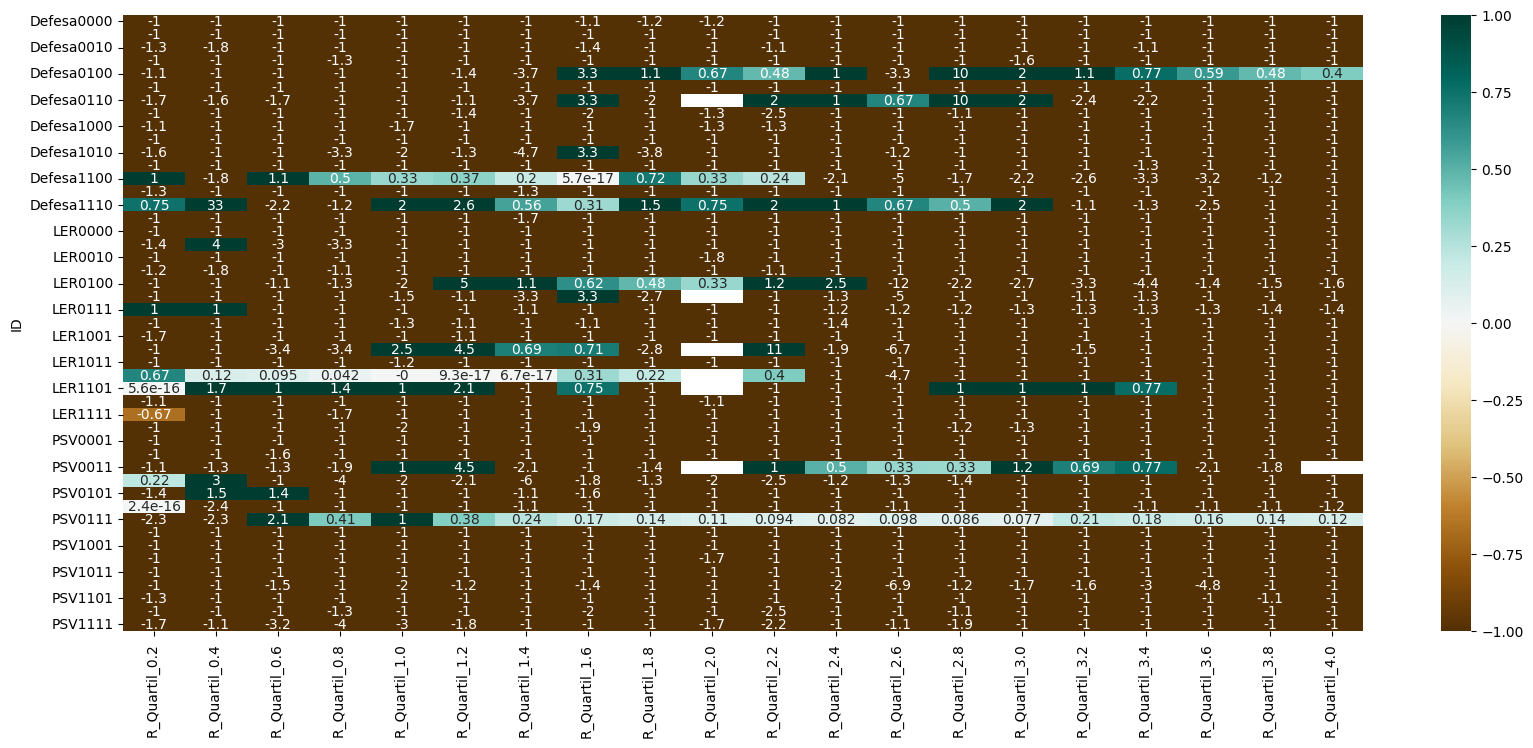

In [249]:
plt.figure(figsize = (20,8))

sns.heatmap(quartis,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)

In [250]:
quartis[(quartis <= 0) | (quartis > 100000)] = 1
quartis.head()

,R_Quartil_0.2,R_Quartil_0.4,R_Quartil_0.6,R_Quartil_0.8,R_Quartil_1.0,R_Quartil_1.2,R_Quartil_1.4,R_Quartil_1.6,R_Quartil_1.8,R_Quartil_2.0,R_Quartil_2.2,R_Quartil_2.4,R_Quartil_2.6,R_Quartil_2.8,R_Quartil_3.0,R_Quartil_3.2,R_Quartil_3.4,R_Quartil_3.6,R_Quartil_3.8,R_Quartil_4.0
ID,,,,,,,,,,,,,,,,,,,,
Defesa0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0
Defesa0001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0
Defesa0010,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0
Defesa0011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.00000,1.0
Defesa0100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.333333,1.111111,0.666667,0.47619,1.0,1.0,10.0,2.0,1.111111,0.769231,0.588235,0.47619,0.4


In [251]:
quartis['Min_R_Quartil'] = quartis.min(axis=1)
quartis['R_Quartil'] = quartis.idxmin(axis=1)
quartis['Alvo_rq'] = quartis['R_Quartil'].str.slice(-4, -1)
quartis = pd.merge(quartis,  trades,\
          how = 'left', left_index = True, right_index = True)

quartis.drop(columns=quartis.columns.difference(['Min_R_Quartil', 'Alvo_rq', 'Trades']), inplace=True)
quartis = quartis.sort_values('Min_R_Quartil', ascending=True)
quartis.style.format({'Min_R_Quartil': '{:,.2%}'})

,Min_R_Quartil,Alvo_rq,Trades
ID,,,
Defesa1100,0.00%,1.6,45
LER1100,0.00%,1.4,48
PSV0110,0.00%,0.2,55
LER1101,0.00%,0.2,39
PSV0111,7.69%,3.0,39
PSV0100,22.22%,0.2,56
Defesa1110,31.25%,1.6,39
PSV0011,32.50%,2.8,67
LER0100,33.33%,2.0,20


### 2.8. *Retornando melhores alvos para o DF "results"*

#### 2.8.1. Por Critério Saldo Trades

In [252]:
results.index = results['ID']

columns.append('Trigger')
columns.append('Data')
columns.append('Alvo_saldo')
columns.append('Max_saldo_trades')

results = pd.merge(results,  tabela_saldo_trades[['Alvo_saldo','Max_saldo_trades']],\
          how = 'right', left_index = True, right_index = True)[columns]

#### 2.8.2. Por Critério Razão Drawdown

In [253]:
columns.append('Trades')
columns.append('Alvo_rdd')
columns.append('Min_Razao_DD')
results = pd.merge(results,  razao_dd[['Trades','Alvo_rdd','Min_Razao_DD']],\
          how = 'right', left_index = True, right_index = True)[columns]

#### 2.8.3. Por Critério Razão Quartil

In [254]:
columns.append('Alvo_rq')
columns.append('Min_R_Quartil')
results = pd.merge(results,  quartis[['Alvo_rq','Min_R_Quartil']],\
          how = 'right', left_index = True, right_index = True)[columns]

In [255]:
results

,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,...,4.0,Trigger,Data,Alvo_saldo,Max_saldo_trades,Trades,Alvo_rdd,Min_Razao_DD,Alvo_rq,Min_R_Quartil
ID,,,,,,,,,,,,,,,,,,,,,
Defesa1100,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,Defesa,2019-04-30 11:25:00,2.2,0.351111,45,1.6,0.197368,1.6,5.742533e-17
Defesa1100,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,...,-1.0,Defesa,2019-05-28 11:55:00,2.2,0.351111,45,1.6,0.197368,1.6,5.742533e-17
Defesa1100,0.2,0.4,0.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,Defesa,2019-05-29 10:45:00,2.2,0.351111,45,1.6,0.197368,1.6,5.742533e-17
Defesa1100,0.2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,Defesa,2019-09-25 10:15:00,2.2,0.351111,45,1.6,0.197368,1.6,5.742533e-17
Defesa1100,0.2,0.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,Defesa,2020-01-27 09:05:00,2.2,0.351111,45,1.6,0.197368,1.6,5.742533e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSV1111,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,...,-1.0,PSV,2024-02-19 10:25:00,2.0,0.070175,342,0.6,0.653333,0.2,1.000000e+00
PSV1111,0.2,0.4,0.6,0.8,1.0,1.2,1.4,-1.0,-1.0,-1.0,...,-1.0,PSV,2024-02-21 10:40:00,2.0,0.070175,342,0.6,0.653333,0.2,1.000000e+00
PSV1111,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,PSV,2024-02-23 11:50:00,2.0,0.070175,342,0.6,0.653333,0.2,1.000000e+00


### 2.9. *Calculando resultado para melhores alvos em DF "results"*

In [256]:
results['ID'] = results.index
results.index = results.Data
results = results.sort_index(ascending=True)

#### 2.9.1. Por Critério Saldo Trades

In [257]:
def obter_valor(row):
    # Verifica se o valor em 'Alvo' é uma coluna válida no DataFrame
    alvo = row['Alvo_saldo']
    if alvo in row.index:
        return row[alvo]
    else:
        return None  # Ou qualquer valor padrão que você deseje atribuir quando 'Alvo' não é uma coluna válida

# Crie uma nova coluna 'Result_Min_DD' aplicando a função à linha
results['Result_Saldo'] = results.apply(obter_valor, axis=1)

#### 2.9.2. Por Critério Razão Drawdown

In [258]:
def obter_valor(row):
    # Verifica se o valor em 'Alvo' é uma coluna válida no DataFrame
    alvo = row['Alvo_rdd']
    if alvo in row.index:
        return row[alvo]
    else:
        return None  # Ou qualquer valor padrão que você deseje atribuir quando 'Alvo' não é uma coluna válida

# Crie uma nova coluna 'Result_Min_DD' aplicando a função à linha
results['Result_Min_DD'] = results.apply(obter_valor, axis=1)

#### 2.9.3. Por Critério Razão Quartil

In [259]:
def obter_valor(row):
    # Verifica se o valor em 'Alvo' é uma coluna válida no DataFrame
    alvo = row['Alvo_rq']
    if alvo in row.index:
        return row[alvo]
    else:
        return None  # Ou qualquer valor padrão que você deseje atribuir quando 'Alvo' não é uma coluna válida

# Crie uma nova coluna 'Result_Min_DD' aplicando a função à linha
results['Result_Min_Quartil'] = results.apply(obter_valor, axis=1)

### 2.10. *Adicionando Custos*

#### 2.10.1. *Buscando Coluna 'Custos' de df_ativou*

In [260]:
df_ativou.index = df_ativou.Data
columns.append('Result_Saldo')
columns.append('Result_Min_DD')
columns.append('Result_Min_Quartil')
columns.append('Custo')
columns.append('ID')
results = pd.merge(results,  df_ativou['Custo'],\
          how = 'right', left_index = True, right_index = True)[columns]

#### 2.10.2. *Adicionando Custos aos Resultados*

In [261]:
results['Result_Saldo'] = results['Result_Saldo'] - (results['Custo']/1000)
results['Result_Min_DD'] = results['Result_Min_DD'] - (results['Custo']/1000)
results['Result_Min_Quartil'] = results['Result_Min_Quartil'] - (results['Custo']/1000)

### 2.11. *SV Analyze*

In [262]:
#visual = sv.analyze(res)
#visual.show_html('Max_result.html')

In [263]:
def segundos_para_hh_mm_ss(segundos_float):
    segundos = int(segundos_float)
    horas = segundos // 3600
    minutos = (segundos % 3600) // 60
    segundos = segundos % 60

    return f'{horas:02d}:{minutos:02d}:{segundos:02d}'

# Exemplo de uso:
segundos_float = time.time() - start_time  # Substitua isso pelo seu valor de tempo em segundos como float
tempo.append(segundos_para_hh_mm_ss(segundos_float))

### 2.12. *Tempo de Execução*

In [264]:
print(tempo[1])

00:03:31


## *3. Resultados*

### *3.1. Testes de Média*

In [265]:
results.columns

Index(['0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0',
       '2.2', '2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.6', '3.8', '4.0',
       'Trigger', 'Data', 'Alvo_saldo', 'Max_saldo_trades', 'Trades',
       'Alvo_rdd', 'Min_Razao_DD', 'Alvo_rq', 'Min_R_Quartil', 'Result_Saldo',
       'Result_Min_DD', 'Result_Min_Quartil', 'Custo', 'ID'],
      dtype='object')

results['V'] = [int(s[-4]) for s in results['ID']]
results['C'] = [int(s[-3]) for s in results['ID']]
results['P'] = [int(s[-2]) for s in results['ID']]
results['Stoch'] = [int(s[-1]) for s in results['ID']]

#### *3.1.1. Volume*

V_1 = results.loc[(results['V'] == 1)]['Result_Min_DD']
V_0 = results.loc[(results['V'] == 0)]['Result_Min_DD']

results.loc[(results['Result_Min_DD'] < 0)]['Result_Min_DD'].count()

plt.hist(V_1, bins='auto', edgecolor='black')  # You can adjust the 'bins' parameter as needed
plt.title('Histogram of Column V')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

teste_norm_V_1 = stats.normaltest(V_1)
teste_norm_V_1.pvalue > 0.05

teste_norm_V_0 = stats.normaltest(V_0)
teste_norm_V_0.pvalue > 0.05

### *3.2. Saldo Trades*

In [266]:
# Criar o vetor com arredondamento
vetor_Max_saldo_trades = np.arange(0.02, 0.42, 0.02)
vetor_Max_saldo_trades = np.round(vetor_Max_saldo_trades, 2).tolist()
vetor_Max_saldo_trades

[0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4]

#### 3.2.1. Criando Dicionários com Resultados e Drawdown para Vetor de Max_saldo_trades

In [267]:
res_saldo = {}  # Dicionário para armazenar os resultados
picos_saldo = {}  # Dicionário para armazenar os picos de saldo
dd_saldo = {}  # Dicionário para armazenar os drawdowns de saldo
max_res_saldo = {}  # Dicionário para armazenar o máximo de resultados de saldo
max_dd_saldo = {}  # Dicionário para armazenar o máximo de drawdown
cont_operacoes = {} # Dicionário para armazenar a contagem de operações
saldo_saldo = {} # Dicionário para armazenar o saldo de saldo
r_dd_saldo = {}  # Dicionário para armazenar a relação de drawdown de saldo

res_saldo_periodos = {} # Dicionário para armazenar os resultados avaliados no período selecionado
dd_saldo_periodos = {} # Dicionário para armazenar os drawdowns avaliados no período selecionado

quartil_res_saldo = {} # Dicionário para armazenar o primeiro quartil dos resultados
quartil_dd_saldo = {} # Dicionário para armazenar o primeiro quartil dos drawdowns

r_quartil_saldo = {} # Dicionário para armazenar a razão quartil de saldo

for i, valor in enumerate(vetor_Max_saldo_trades):
    valor_arredondado = round(valor, 2)
    res_saldo[valor_arredondado] = results['Result_Saldo'].loc[
        (results['Max_saldo_trades'] >= valor) & (results['Trades'] >= 30)
    ].cumsum()

    picos_saldo[valor_arredondado] = res_saldo[valor_arredondado].cummax()
    dd_saldo[valor_arredondado] = res_saldo[valor_arredondado] - picos_saldo[valor_arredondado]

#### 3.2.2. Por Critério Saldo Trades

In [268]:
for j, valor in enumerate(vetor_Max_saldo_trades):
    valor_arredondado = round(valor, 2)
    
    max_res_saldo[valor_arredondado] = res_saldo[valor_arredondado].max()
    cont_operacoes[valor_arredondado] = res_saldo[valor_arredondado].count()
    
    # Avoid division by zero
    if (cont_operacoes[valor_arredondado] != 0).any():
        saldo_saldo[valor_arredondado] = abs(max_res_saldo[valor_arredondado] / cont_operacoes[valor_arredondado])
    else:
        saldo_saldo[valor_arredondado] = 0

In [269]:
# Encontre a chave com o maior valor
chave_maior_valor_saldo_saldo = max(saldo_saldo, key=saldo_saldo.get)
chave_maior_valor_saldo_saldo

0.38

#### 3.2.3. Por Critério Razão Drawdown

In [270]:
for j, valor in enumerate(vetor_Max_saldo_trades):
    valor_arredondado = round(valor, 2)
    
    
    max_dd_saldo[valor_arredondado] = dd_saldo[valor_arredondado].min()
    
    # Avoid division by zero
    if (max_res_saldo[valor_arredondado] != 0):
        r_dd_saldo[valor_arredondado] = abs(max_dd_saldo[valor_arredondado] / max_res_saldo[valor_arredondado])
    else:
        r_dd_saldo[valor_arredondado] = 0

In [271]:
# Encontre a chave com o menor valor
chave_menor_valor_r_dd_saldo = min(r_dd_saldo, key=r_dd_saldo.get)
chave_menor_valor_r_dd_saldo

0.2

In [272]:
r_dd_saldo

{0.02: 0.1286201606489272,
 0.04: 0.1362992304565829,
 0.06: 0.13250893454643797,
 0.08: 0.09502870046705363,
 0.1: 0.09502870046705363,
 0.12: 0.10209059644527829,
 0.14: 0.06842472866851705,
 0.16: 0.06842472866851705,
 0.18: 0.06842472866851705,
 0.2: 0.06576644128878255,
 0.22: 0.07527981490337436,
 0.24: 0.09577868109948838,
 0.26: 0.11747214538303433,
 0.28: 0.07832517172248328,
 0.3: 0.07832517172248328,
 0.32: 0.07832517172248328,
 0.34: 0.07832517172248328,
 0.36: 0.08518403147799,
 0.38: 0.07926785659552296,
 0.4: 0.07926785659552296}

#### 3.2.4. Por Critério Razão Quartil

In [273]:
for j, valor in enumerate(vetor_Max_saldo_trades):
    valor_arredondado = round(valor, 2)
    
    res_saldo_periodos[valor_arredondado] = res_saldo[valor_arredondado].diff(periods = periodo)
    dd_saldo_periodos[valor_arredondado] = dd_saldo[valor_arredondado].diff(periods = periodo)
    
    quartil_res_saldo[valor_arredondado] = res_saldo_periodos[valor_arredondado].quantile(0.25)
    quartil_dd_saldo[valor_arredondado] = dd_saldo_periodos[valor_arredondado].quantile(0.25)
    
    if quartil_res_saldo[valor_arredondado] > 0:
        r_quartil_saldo[valor_arredondado] = (-quartil_dd_saldo[valor_arredondado]) / quartil_res_saldo[valor_arredondado]
    else:
        r_quartil_saldo[valor_arredondado] = 1
    
    

In [274]:
# Encontre a chave com o menor valor
chave_menor_valor_r_q_saldo = min(r_quartil_saldo, key=r_quartil_saldo.get)
chave_menor_valor_r_q_saldo

0.38

#### 3.2.5. Comparação

Text(0.5, 1.0, 'Drawdown')

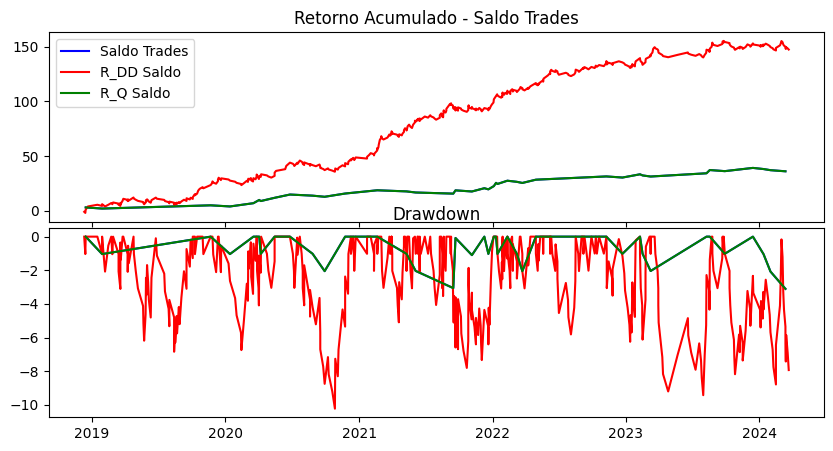

In [275]:
fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(nrows = 10, ncols = 1)

ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5:11, 0])

# Plots
line1, = ax1.plot(res_saldo[chave_maior_valor_saldo_saldo],color = 'blue', label='Saldo Trades')
line2, = ax1.plot(res_saldo[chave_menor_valor_r_dd_saldo], color='red', label='R_DD Saldo')
line3, = ax1.plot(res_saldo[chave_menor_valor_r_q_saldo], color='green', label='R_Q Saldo')

line4, = ax2.plot(dd_saldo[chave_maior_valor_saldo_saldo], color = 'blue', label='Saldo Trades')
line5, = ax2.plot(dd_saldo[chave_menor_valor_r_dd_saldo], color="red", label='R_DD Saldo')
line6, = ax2.plot(dd_saldo[chave_menor_valor_r_q_saldo], color="green", label='R_Q Saldo')


# Legendas
ax1.legend(handles=[line1, line2, line3], loc='upper left')

ax1.set_title('Retorno Acumulado - Saldo Trades')
ax2.set_title('Drawdown')

In [276]:
ops_realizadas = res_saldo[chave_menor_valor_r_dd_saldo].shape[0]
print(f"Operações realizadas: {ops_realizadas}")

# Filtrar os resultados com base na condição
estrategias_inclusas = results.loc[results['Max_saldo_trades'] >= chave_menor_valor_r_dd_saldo, ['ID', 'Alvo_saldo', 'Trades','Max_saldo_trades']]

# Obter valores únicos das estratégias incluídas
estrategias_inclusas_unicas = estrategias_inclusas.drop_duplicates(subset=['ID'])

estrategias_inclusas_unicas.reset_index(drop=True,inplace=True)

estrategias_inclusas_unicas.sort_values('Max_saldo_trades', ascending=False,inplace=True)

# Exibir o DataFrame de estratégias incluídas
print(f"Estratégias inclusas:\n{estrategias_inclusas_unicas}")


Operações realizadas: 477
Estratégias inclusas:
           ID Alvo_saldo  Trades  Max_saldo_trades
2     PSV0111        3.0    39.0          0.948718
8  Defesa0100        2.2    23.0          0.530435
1     PSV0011        2.4    67.0          0.370149
9  Defesa1100        2.2    45.0          0.351111
4     LER0100        2.0    20.0          0.350000
6     LER1100        1.8    48.0          0.341667
7  Defesa1110        2.8    39.0          0.266667
3  Defesa0110        3.0    48.0          0.250000
0     LER1010        1.6   135.0          0.232593
5     PSV0100        1.6    56.0          0.207143


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\1586545240.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [277]:
results.columns

Index(['0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0',
       '2.2', '2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.6', '3.8', '4.0',
       'Trigger', 'Data', 'Alvo_saldo', 'Max_saldo_trades', 'Trades',
       'Alvo_rdd', 'Min_Razao_DD', 'Alvo_rq', 'Min_R_Quartil', 'Result_Saldo',
       'Result_Min_DD', 'Result_Min_Quartil', 'Custo', 'ID'],
      dtype='object')

Resultado Acumulado:  118.17
Drawdown Máximo:  8.46
Primeiro quartil do drawdown:  0.19
Terceiro quartil do drawdown:  3.63
---
Considerando uma banca de duas vezes o drawdown máximo:  16.92
Resultado Percentual:  698.61 %
Resultado Anualizado:  132.26 % a.a.
---
Considerando uma banca de três vezes o drawdown máximo:  25.37
Resultado Percentual:  465.74 %
Resultado Anualizado:  88.17 % a.a.
---
Considerando uma banca de quatro vezes o drawdown máximo:  33.83
Resultado Percentual:  349.3 %
Resultado Anualizado:  66.13 % a.a.
---
ID
LER1010                      135.000000
PSV0011                       67.000000
PSV0100                       56.000000
Defesa0110                    48.000000
LER1100                       48.000000
Defesa1100                    45.000000
Defesa1110                    39.000000
PSV0111                       39.000000
Total                        477.000000
Operações por Dia              0.227178
Operações por Ano             82.920124
Dias Úteis sem Operaçõ

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\633411391.py:47: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16092\633411391.py:58: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



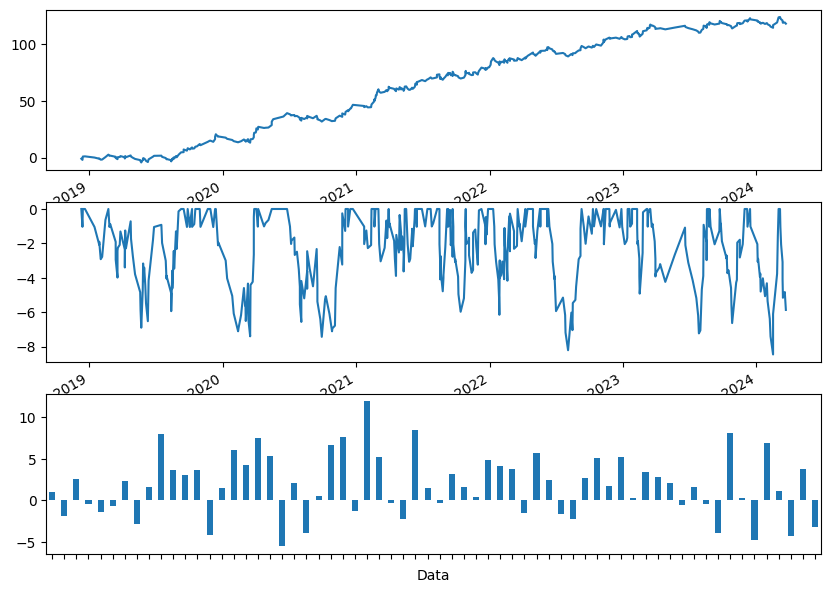

In [278]:
import matplotlib.pyplot as plt
selecao_results = results.loc[(results.Max_saldo_trades >= chave_menor_valor_r_dd_saldo) & (results.Trades >= 30)]
resultado_acumulado = selecao_results['Result_Min_DD'].cumsum()
# Calculate drawdown for this curve
drawdown = selecao_results['Result_Min_DD'].cumsum().cummax() - selecao_results['Result_Min_DD'].cumsum()
print('Resultado Acumulado: ', round(resultado_acumulado.iloc[-1],2))
print('Drawdown Máximo: ',round(drawdown.max(),2))

print('Primeiro quartil do drawdown: ', round(drawdown.quantile(0.25), 2))
print('Terceiro quartil do drawdown: ',round(drawdown.quantile(0.75), 2))

print('---')
print('Considerando uma banca de duas vezes o drawdown máximo: ', round(drawdown.max() * 2, 2))
res_percentual = round((resultado_acumulado.iloc[-1] / (drawdown.max() * 2))*100,2)
print('Resultado Percentual: ',res_percentual,'%')
# conte o número de anos totais
dias_totais = (results.index[-1] - results.index[0]).days
dia_uteis = (results.index[-1] - results.index[0]).days - results.index[0].weekday()
anos_totais = dias_totais / 365
print('Resultado Anualizado: ', round(res_percentual / anos_totais, 2), r'% a.a.')

print('---')
print('Considerando uma banca de três vezes o drawdown máximo: ', round(drawdown.max() * 3, 2))
res_percentual = round((resultado_acumulado.iloc[-1] / (drawdown.max() * 3))*100, 2)
print('Resultado Percentual: ', res_percentual, '%')
print('Resultado Anualizado: ', round(res_percentual / anos_totais, 2), r'% a.a.')

print('---')
print('Considerando uma banca de quatro vezes o drawdown máximo: ', round(drawdown.max() * 4, 2))
res_percentual = round((resultado_acumulado.iloc[-1] / (drawdown.max() * 4))*100, 2)
print('Resultado Percentual: ', res_percentual, '%')
print('Resultado Anualizado: ', round(res_percentual / anos_totais, 2), r'% a.a.')

print('---')
gb = selecao_results.groupby('ID')['Trades'].mean()
gb = gb.sort_values(ascending=False)
# adicione em gb uma linha com a soma de Trades
gb.loc['Total'] = gb.sum()
gb.loc['Operações por Dia'] = gb.iloc[:-2].sum() / dia_uteis
gb.loc['Operações por Ano'] = gb.iloc[:-3].sum() / anos_totais
gb.loc['Dias Úteis sem Operações'] = dia_uteis - gb.iloc[:-4].sum().sum()
gb.loc['Dias Úteis com Operações'] = gb.iloc[:-5].sum().sum()
print(gb)

# gere para mim um gráfico acumulando mensalmente o resultado e plote em gráfico de barras

resultado_acumulado_mensal = selecao_results['Result_Min_DD'].resample('M').sum()
# Faça os plots em plotlly e divida em subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
resultado_acumulado.plot(ax=axs[0])
drawdown = -drawdown
drawdown.plot(ax=axs[1])
# resultado acumulado em barras

resultado_acumulado_mensal.plot(kind='bar', ax=axs[2])
# remova os valores eixo x nesse subplot
axs[2].set_xticklabels([])
fig.show();

### *3.3. Razão DD*

In [ ]:
# Criar o vetor com arredondamento
vetor_Min_Razao_DD = np.arange(0.26, 0.92, 0.02)
vetor_Min_Razao_DD = np.round(vetor_Min_Razao_DD, 2).tolist()
vetor_Min_Razao_DD

[0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.82,
 0.84,
 0.86,
 0.88,
 0.9]

#### 3.3.1. Criando Dicionários com Resultados e Drawdown para Vetor de Max_saldo_trades

In [ ]:
res_rdd = {}  # Dicionário para armazenar os resultados
picos_rdd = {}  # Dicionário para armazenar os picos de saldo
dd_rdd = {}  # Dicionário para armazenar os drawdowns de saldo
max_res_rdd = {}  # Dicionário para armazenar o máximo de resultados de saldo
max_dd_rdd = {}  # Dicionário para armazenar o máximo de drawdown
cont_operacoes = {} # Dicionário para armazenar a contagem de operações
saldo_res_rdd = {} # Dicionário para armazenar o saldo de saldo
r_dd_res_rdd = {}  # Dicionário para armazenar a relação de drawdown de saldo

res_rdd_periodos = {} # Dicionário para armazenar os resultados avaliados no período selecionado
dd_rdd_periodos = {} # Dicionário para armazenar os drawdowns avaliados no período selecionado

quartil_res_rdd = {} # Dicionário para armazenar o primeiro quartil dos resultados
quartil_dd_rdd = {} # Dicionário para armazenar o primeiro quartil dos drawdowns

r_quartil_rdd = {} # Dicionário para armazenar a razão quartil de saldo

for i, valor in enumerate(vetor_Min_Razao_DD):
    valor_arredondado = round(valor, 2)
    res_rdd[valor_arredondado] = results['Result_Min_DD'].loc[
        (results['Min_Razao_DD'] <= valor) & (results['Trades'] >= 50)
    ].cumsum()

    picos_rdd[valor_arredondado] = res_rdd[valor_arredondado].cummax()
    dd_rdd[valor_arredondado] = res_rdd[valor_arredondado] - picos_rdd[valor_arredondado]

#### 3.3.2. Por Critério Saldo Trades

In [ ]:
for j, valor in enumerate(vetor_Min_Razao_DD):
    valor_arredondado = round(valor, 2)
    
    max_res_rdd[valor_arredondado] = res_rdd[valor_arredondado].max()
    cont_operacoes[valor_arredondado] = res_rdd[valor_arredondado].count()
    
    # Avoid division by zero
    if (cont_operacoes[valor_arredondado] != 0):
        saldo_res_rdd[valor_arredondado] = abs(max_res_rdd[valor_arredondado] / cont_operacoes[valor_arredondado])
    else:
        saldo_res_rdd[valor_arredondado] = 0

In [ ]:
# Encontre a chave com o maior valor
chave_maior_valor_saldo_res_rdd = max(saldo_res_rdd, key=saldo_res_rdd.get)
chave_maior_valor_saldo_res_rdd

0.32

#### 3.2.3. Por Critério Razão Drawdown

In [ ]:
for j, valor in enumerate(vetor_Min_Razao_DD):
    valor_arredondado = round(valor, 2)
    
    
    max_dd_rdd[valor_arredondado] = dd_rdd[valor_arredondado].min()
    
    # Avoid division by zero
    if (max_res_rdd[valor_arredondado] != 0):
        r_dd_res_rdd[valor_arredondado] = abs(max_dd_rdd[valor_arredondado] / max_res_rdd[valor_arredondado])
    else:
        r_dd_res_rdd[valor_arredondado] = 0

In [ ]:
# Encontre a chave com o menor valor
chave_menor_valor_r_dd_res_rdd = min(r_dd_res_rdd, key=r_dd_res_rdd.get)
chave_menor_valor_r_dd_res_rdd

0.26

In [ ]:
r_dd_res_rdd

{0.26: nan,
 0.28: nan,
 0.3: nan,
 0.32: 0.41093685936859353,
 0.34: 0.41093685936859353,
 0.36: 0.41093685936859353,
 0.38: 0.41093685936859353,
 0.4: 0.41093685936859353,
 0.42: 0.41093685936859353,
 0.44: 0.41093685936859353,
 0.46: 0.41093685936859353,
 0.48: 0.41093685936859353,
 0.5: 0.41093685936859353,
 0.52: 0.41093685936859353,
 0.54: 0.41093685936859353,
 0.56: 0.41093685936859353,
 0.58: 0.41093685936859353,
 0.6: 0.41093685936859353,
 0.62: 0.41093685936859353,
 0.64: 0.41093685936859353,
 0.66: 0.41093685936859353,
 0.68: 0.43445900654138614,
 0.7: 0.43445900654138614,
 0.72: 0.43445900654138614,
 0.74: 0.43445900654138614,
 0.76: 0.43445900654138614,
 0.78: 0.43445900654138614,
 0.8: 0.40563830616860325,
 0.82: 0.40563830616860325,
 0.84: 0.40563830616860325,
 0.86: 0.40563830616860325,
 0.88: 0.40563830616860325,
 0.9: 0.48449429794781573}

#### 3.2.4. Por Critério Razão Quartil

In [ ]:
for j, valor in enumerate(vetor_Min_Razao_DD):
    valor_arredondado = round(valor, 2)
    
    res_rdd_periodos[valor_arredondado] = res_rdd[valor_arredondado].diff(periods = periodo)
    dd_rdd_periodos[valor_arredondado] = dd_rdd[valor_arredondado].diff(periods = periodo)
    
    quartil_res_rdd[valor_arredondado] = res_rdd_periodos[valor_arredondado].quantile(0.25)
    quartil_dd_rdd[valor_arredondado] = dd_rdd_periodos[valor_arredondado].quantile(0.25)
    
    if quartil_res_rdd[valor_arredondado] > 0:
        r_quartil_rdd[valor_arredondado] = (-quartil_dd_rdd[valor_arredondado]) / quartil_res_rdd[valor_arredondado]
    else:
        r_quartil_rdd[valor_arredondado] = 1
    
    

In [ ]:
# Encontre a chave com o menor valor
chave_menor_valor_r_q_res_rdd = min(r_quartil_rdd, key=r_quartil_rdd.get)
chave_menor_valor_r_q_res_rdd

0.26

In [ ]:
r_quartil_rdd

{0.26: 1,
 0.28: 1,
 0.3: 1,
 0.32: 5.20314600699111,
 0.34: 5.20314600699111,
 0.36: 5.20314600699111,
 0.38: 5.20314600699111,
 0.4: 5.20314600699111,
 0.42: 5.20314600699111,
 0.44: 5.20314600699111,
 0.46: 5.20314600699111,
 0.48: 5.20314600699111,
 0.5: 5.20314600699111,
 0.52: 5.20314600699111,
 0.54: 5.20314600699111,
 0.56: 5.20314600699111,
 0.58: 5.20314600699111,
 0.6: 5.20314600699111,
 0.62: 5.20314600699111,
 0.64: 5.20314600699111,
 0.66: 5.20314600699111,
 0.68: 1,
 0.7: 1,
 0.72: 1,
 0.74: 1,
 0.76: 1,
 0.78: 1,
 0.8: 1,
 0.82: 1,
 0.84: 1,
 0.86: 1,
 0.88: 1,
 0.9: 1}

#### 3.2.5. Comparação

Text(0.5, 1.0, 'Drawdown')

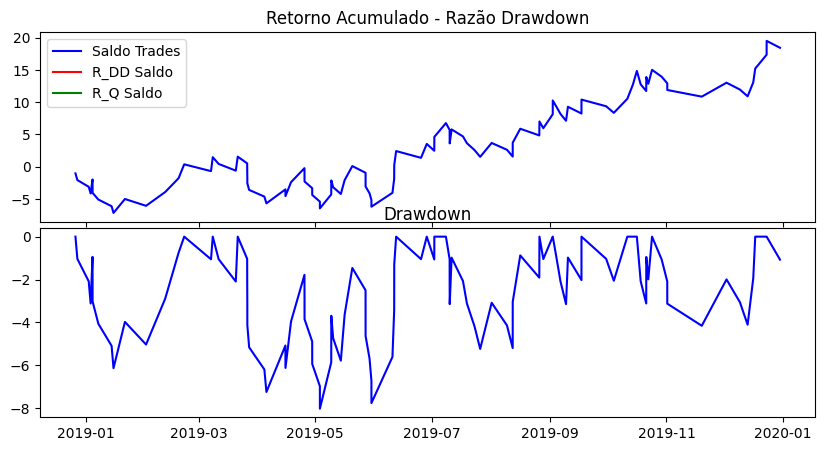

In [ ]:
fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(nrows = 10, ncols = 1)

ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5:11, 0])

# Plots
line1, = ax1.plot(res_rdd[chave_maior_valor_saldo_res_rdd],color = 'blue', label='Saldo Trades')
line2, = ax1.plot(res_rdd[chave_menor_valor_r_dd_res_rdd], color='red', label='R_DD Saldo')
line3, = ax1.plot(res_rdd[chave_menor_valor_r_q_res_rdd], color='green', label='R_Q Saldo')

line4, = ax2.plot(dd_rdd[chave_maior_valor_saldo_res_rdd], color = 'blue', label='Saldo Trades')
line5, = ax2.plot(dd_rdd[chave_menor_valor_r_dd_res_rdd], color="red", label='R_DD Saldo')
line6, = ax2.plot(dd_rdd[chave_menor_valor_r_q_res_rdd], color="green", label='R_Q Saldo')


# Legendas
ax1.legend(handles=[line1, line2, line3], loc='upper left')

ax1.set_title('Retorno Acumulado - Razão Drawdown')
ax2.set_title('Drawdown')

In [ ]:
res_rdd[chave_menor_valor_r_q_res_rdd].count()

0

### *3.4. Razão Quartil*

In [ ]:
results.Min_R_Quartil.unique()

array([1.        ,        nan, 0.28571429, 0.7       , 1.        ])

In [ ]:
# Criar o vetor com arredondamento
vetor_Min_R_Quartil = np.arange(0.02, 0.9, 0.02)
vetor_Min_R_Quartil = np.round(vetor_Min_R_Quartil, 2).tolist()
vetor_Min_R_Quartil

[0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.82,
 0.84,
 0.86,
 0.88]

#### 3.4.1. Criando Dicionários com Resultados e Drawdown para Vetor de Max_saldo_trades

In [ ]:
res_rq = {}  # Dicionário para armazenar os resultados
picos_rq = {}  # Dicionário para armazenar os picos de saldo
dd_rq = {}  # Dicionário para armazenar os drawdowns de saldo
max_res_rq = {}  # Dicionário para armazenar o máximo de resultados de saldo
max_dd_rq = {}  # Dicionário para armazenar o máximo de drawdown
cont_operacoes = {} # Dicionário para armazenar a contagem de operações
saldo_res_rq = {} # Dicionário para armazenar o saldo de saldo
r_dd_res_rq = {}  # Dicionário para armazenar a relação de drawdown de saldo

res_rq_periodos = {} # Dicionário para armazenar os resultados avaliados no período selecionado
dd_rq_periodos = {} # Dicionário para armazenar os drawdowns avaliados no período selecionado

quartil_res_rq = {} # Dicionário para armazenar o primeiro quartil dos resultados
quartil_dd_rq = {} # Dicionário para armazenar o primeiro quartil dos drawdowns

r_quartil_rq = {} # Dicionário para armazenar a razão quartil de saldo

for i, valor in enumerate(vetor_Min_R_Quartil):
    valor_arredondado = round(valor, 2)
    res_rq[valor_arredondado] = results['Result_Min_Quartil'].loc[
        (results['Min_R_Quartil'] <= valor) & (results['Trades'] >= 50)
    ].cumsum()

    picos_rq[valor_arredondado] = res_rq[valor_arredondado].cummax()
    dd_rq[valor_arredondado] = res_rq[valor_arredondado] - picos_rq[valor_arredondado]

#### 3.3.2. Por Critério Saldo Trades

In [ ]:
for j, valor in enumerate(vetor_Min_R_Quartil):
    valor_arredondado = round(valor, 2)
    
    max_res_rq[valor_arredondado] = res_rq[valor_arredondado].max()
    cont_operacoes[valor_arredondado] = res_rq[valor_arredondado].count()
    
    # Avoid division by zero
    if (cont_operacoes[valor_arredondado] != 0):
        saldo_res_rq[valor_arredondado] = abs(max_res_rq[valor_arredondado] / cont_operacoes[valor_arredondado])
    else:
        saldo_res_rq[valor_arredondado] = 0

In [ ]:
# Encontre a chave com o maior valor
chave_maior_valor_saldo_res_rq = max(saldo_res_rq, key=saldo_res_rq.get)
chave_maior_valor_saldo_res_rq

0.72

In [ ]:
saldo_res_rq

{0.02: 0,
 0.04: 0,
 0.06: 0,
 0.08: 0,
 0.1: 0,
 0.12: 0,
 0.14: 0,
 0.16: 0,
 0.18: 0,
 0.2: 0,
 0.22: 0,
 0.24: 0,
 0.26: 0,
 0.28: 0,
 0.3: 0,
 0.32: 0,
 0.34: 0,
 0.36: 0,
 0.38: 0,
 0.4: 0,
 0.42: 0,
 0.44: 0,
 0.46: 0,
 0.48: 0,
 0.5: 0,
 0.52: 0,
 0.54: 0,
 0.56: 0,
 0.58: 0,
 0.6: 0,
 0.62: 0,
 0.64: 0,
 0.66: 0,
 0.68: 0,
 0.7: 0,
 0.72: 0.19725714285714285,
 0.74: 0.19725714285714285,
 0.76: 0.19725714285714285,
 0.78: 0.19725714285714285,
 0.8: 0.19725714285714285,
 0.82: 0.19725714285714285,
 0.84: 0.19725714285714285,
 0.86: 0.19725714285714285,
 0.88: 0.19725714285714285}

#### 3.4.3. Por Critério Razão Drawdown

In [ ]:
for j, valor in enumerate(vetor_Min_R_Quartil):
    valor_arredondado = round(valor, 2)
    
    
    max_dd_rq[valor_arredondado] = dd_rq[valor_arredondado].min()
    
    # Avoid division by zero
    if (max_res_rq[valor_arredondado] != 0):
        r_dd_res_rq[valor_arredondado] = abs(max_dd_rq[valor_arredondado] / max_res_rq[valor_arredondado])
    else:
        r_dd_res_rq[valor_arredondado] = 0

In [ ]:
# Encontre a chave com o menor valor
chave_menor_valor_r_dd_res_rq = min(r_dd_res_rq, key=r_dd_res_rq.get)
chave_menor_valor_r_dd_res_rq

0.02

In [ ]:
r_dd_res_rq

{0.02: nan,
 0.04: nan,
 0.06: nan,
 0.08: nan,
 0.1: nan,
 0.12: nan,
 0.14: nan,
 0.16: nan,
 0.18: nan,
 0.2: nan,
 0.22: nan,
 0.24: nan,
 0.26: nan,
 0.28: nan,
 0.3: nan,
 0.32: nan,
 0.34: nan,
 0.36: nan,
 0.38: nan,
 0.4: nan,
 0.42: nan,
 0.44: nan,
 0.46: nan,
 0.48: nan,
 0.5: nan,
 0.52: nan,
 0.54: nan,
 0.56: nan,
 0.58: nan,
 0.6: nan,
 0.62: nan,
 0.64: nan,
 0.66: nan,
 0.68: nan,
 0.7: nan,
 0.72: 0.4710892236384705,
 0.74: 0.4710892236384705,
 0.76: 0.4710892236384705,
 0.78: 0.4710892236384705,
 0.8: 0.4710892236384705,
 0.82: 0.4710892236384705,
 0.84: 0.4710892236384705,
 0.86: 0.4710892236384705,
 0.88: 0.4710892236384705}

#### 3.2.4. Por Critério Razão Quartil

In [ ]:
for j, valor in enumerate(vetor_Min_R_Quartil):
    valor_arredondado = round(valor, 2)
    
    res_rq_periodos[valor_arredondado] = res_rq[valor_arredondado].diff(periods = periodo)
    dd_rq_periodos[valor_arredondado] = dd_rq[valor_arredondado].diff(periods = periodo)
    
    quartil_res_rq[valor_arredondado] = res_rq_periodos[valor_arredondado].quantile(0.25)
    quartil_dd_rq[valor_arredondado] = dd_rq_periodos[valor_arredondado].quantile(0.25)
    
    if quartil_res_rq[valor_arredondado] > 0:
        r_quartil_rq[valor_arredondado] = (-quartil_dd_rq[valor_arredondado]) / quartil_res_rq[valor_arredondado]
    else:
        r_quartil_rq[valor_arredondado] = 1
    
    

In [ ]:
# Encontre a chave com o menor valor
chave_menor_valor_r_q_res_rq = min(r_quartil_rq, key=r_quartil_rq.get)
chave_menor_valor_r_q_res_rq

0.02

In [ ]:
r_quartil_rq

{0.02: 1,
 0.04: 1,
 0.06: 1,
 0.08: 1,
 0.1: 1,
 0.12: 1,
 0.14: 1,
 0.16: 1,
 0.18: 1,
 0.2: 1,
 0.22: 1,
 0.24: 1,
 0.26: 1,
 0.28: 1,
 0.3: 1,
 0.32: 1,
 0.34: 1,
 0.36: 1,
 0.38: 1,
 0.4: 1,
 0.42: 1,
 0.44: 1,
 0.46: 1,
 0.48: 1,
 0.5: 1,
 0.52: 1,
 0.54: 1,
 0.56: 1,
 0.58: 1,
 0.6: 1,
 0.62: 1,
 0.64: 1,
 0.66: 1,
 0.68: 1,
 0.7: 1,
 0.72: 1.7026153272267592,
 0.74: 1.7026153272267592,
 0.76: 1.7026153272267592,
 0.78: 1.7026153272267592,
 0.8: 1.7026153272267592,
 0.82: 1.7026153272267592,
 0.84: 1.7026153272267592,
 0.86: 1.7026153272267592,
 0.88: 1.7026153272267592}

#### 3.2.5. Comparação

Text(0.5, 1.0, 'Drawdown')

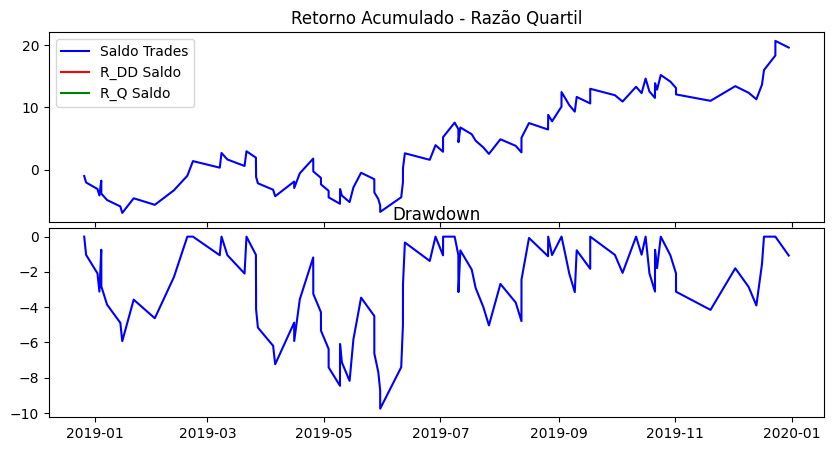

In [ ]:
fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(nrows = 10, ncols = 1)

ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5:11, 0])

# Plots
line1, = ax1.plot(res_rq[chave_maior_valor_saldo_res_rq],color = 'blue', label='Saldo Trades')
line2, = ax1.plot(res_rq[chave_menor_valor_r_dd_res_rq], color='red', label='R_DD Saldo')
line3, = ax1.plot(res_rq[chave_menor_valor_r_q_res_rq], color='green', label='R_Q Saldo')

line4, = ax2.plot(dd_rq[chave_maior_valor_saldo_res_rq], color = 'blue', label='Saldo Trades')
line5, = ax2.plot(dd_rq[chave_menor_valor_r_dd_res_rq], color="red", label='R_DD Saldo')
line6, = ax2.plot(dd_rq[chave_menor_valor_r_q_res_rq], color="green", label='R_Q Saldo')


# Legendas
ax1.legend(handles=[line1, line2, line3], loc='upper left')

ax1.set_title('Retorno Acumulado - Razão Quartil')
ax2.set_title('Drawdown')

In [ ]:
res_rq[chave_menor_valor_r_q_res_rq].count()

0

In [ ]:
results.columns

Index(['0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0',
       '2.2', '2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.6', '3.8', '4.0',
       'Trigger', 'Data', 'Alvo_saldo', 'Max_saldo_trades', 'Trades',
       'Alvo_rdd', 'Min_Razao_DD', 'Alvo_rq', 'Min_R_Quartil', 'Result_Saldo',
       'Result_Min_DD', 'Result_Min_Quartil', 'Custo', 'ID'],
      dtype='object')

In [ ]:
results.loc[results['Min_Razao_DD'] <= chave_menor_valor_r_q_res_rdd]['ID'].unique()

array([], dtype=object)